# Jupyter Notebook for Cybersecurity - Part 4/5

**The is part 4/5 of the project. While some of the instructions and code will repeat it is recommended that you review previous parts to get a complete understanding of the process.**

Jupter Notebook is an open interactive tool for large-scale data exploration, transformation, analysis, and visualization. It is built on Jupyter (formerly IPython) and is similar to Google Cloud's Datalab.

The data set used in this Jupyter Notebook is the CobaltStrike_Hunting Google Doc The sheet named Cobalt Strike -Te-k research 2020 was downloaded and saved locally as a CSV file.

Link to the Google Doc Sheet is: https://docs.google.com/spreadsheets/d/1bYvBh6NkNYGstfQWnT5n7cSxdhjSn1mduX8cziWSGrw/edit#gid=516128248

# Getting Started

## Install Libraries

First step: in your computer's command prompt enter the following two commands to install the pandas and matplotlib libraries:

Note: "Pip3" is a version of the pip installer for python3

Note: If you have already installed these during the earlier parts then you can skip the above step

In [70]:
import pandas as pd
# data analysis and manipulation tool

import numpy as np
# mathematical functions

import matplotlib.pyplot as plt
# creating static, animated, and interactive visualizations

%matplotlib inline
# renders static images 

# %matplotlib notebook
# renders dynamic interactive images 

import re
# regular expression library

import socket
# allows various network operations. Here its used to get hostname of an IP address

import ipapi
# https://github.com/ipapi-co/ipapi-python

# import json
# handling json format data

import time
# provides various time-related functions. Here its used to pause execution for few seconds

import sys
# access system-specific parameters and functions

import collections
# built-in Python module that implements specialized container datatypes. 
# here it is used to identify any duplicates


#import pandas_profiling
#from pandas_profiling import ProfileReport
#from pandas_profiling.utils.cache import cache_file
#https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html
#https://towardsdatascience.com/accelerate-your-exploratory-data-analysis-with-pandas-profiling-4eca0cb770d1


#!jupyter nbextension enable --py widgetsnbextension


In [19]:
df = pd.read_csv('cb_servers_small.csv')
print(df)

              Host   SSL  Port  \
0    54.66.253.144  True   443   
1  103.243.183.250  True   443   
2    185.82.126.47  True   443   
3   94.156.174.121  True   443   

                                             GET uri  \
0  54.66.253.144,/s/ref=nb_sb_noss_1/167-3294888-...   
1                         103.243.183.250,/search.js   
2                               185.82.126.47,/pixel   
3                              94.156.174.121,/watch   

                    POST uri  \
0  /N4215/adj/amzn.us.sr.aps   
1                        /hr   
2                /submit.php   
3                 /ptracking   

                                          User Agent  Watermark  
0  Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....  562884990  
1  Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...  305419896  
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...  305419896  
3  Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...   76803050  


# Default Data Display

By default, the pandas' library displays just a few rows of the full output. You can override this to display all of the output by executing the following code:

In [11]:
# pd.set_option('display.max_rows', df.shape[0]+1)
# print(df)

### Confirm a Successful Data Load

In [20]:
df.head()

,Host,SSL,Port,GET uri,POST uri,User Agent,Watermark
0,54.66.253.144,True,443,"54.66.253.144,/s/ref=nb_sb_noss_1/167-3294888-...",/N4215/adj/amzn.us.sr.aps,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,562884990
1,103.243.183.250,True,443,"103.243.183.250,/search.js",/hr,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,305419896
2,185.82.126.47,True,443,"185.82.126.47,/pixel",/submit.php,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,305419896
3,94.156.174.121,True,443,"94.156.174.121,/watch",/ptracking,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,76803050


# Data Iteration

In [23]:
# Iterate over the "Host" column
for i, row in df.iterrows():
    print(row['Host'])

54.66.253.144
103.243.183.250
185.82.126.47
94.156.174.121


### Save Iteration Results

In [24]:
# Save the results from the above iteration on the "Host" column to a new variable named "ip_list"
ip_list = []
for i, row in df.iterrows():
    my_list = (row['Host'])
    ip_list.append(my_list)
print(ip_list)

['54.66.253.144', '103.243.183.250', '185.82.126.47', '94.156.174.121']


### Check for Duplicates

In [26]:
# check if the "ip_list" contains any duplicates. 
# if there are, we wouldn't remove since we want to account for those in stats later

print([item for item, count in collections.Counter(ip_list).items() if count > 1])



[]


In [8]:
# for ip in ip_list:
#     print(ipapi.location(ip))
#     time.sleep(5)

## Enrich Data

The IP addresses by themselves are not as useful. We will use a free service (ipapi[.]co) to pull intelligence on the IP addresses such as their geo-location, ASN, and hosting provider.

In [28]:
# create an empty list to store results
ip_res_result = []

# iterate each IP in the "ip_list" that was created earlier and enrich each IP using the ipapi library
for ip in ip_list:
    try:
        ip_res_result.append((ipapi.location(ip)))
        time.sleep(7)
    except Exception as e:
        ip_res_result.append(e)

In [30]:
# print results of the "ip_res_result" which now contains enriched data in json format
ip_res_result

[{'asn': 'AS16509',
  'city': 'Sydney',
  'continent_code': 'OC',
  'country': 'AU',
  'country_area': 7686850.0,
  'country_calling_code': '+61',
  'country_capital': 'Canberra',
  'country_code': 'AU',
  'country_code_iso3': 'AUS',
  'country_name': 'Australia',
  'country_population': 24992369.0,
  'country_tld': '.au',
  'currency': 'AUD',
  'currency_name': 'Dollar',
  'in_eu': False,
  'ip': '54.66.253.144',
  'languages': 'en-AU',
  'latitude': -33.8591,
  'longitude': 151.2002,
  'org': 'AMAZON-02',
  'postal': '2000',
  'region': 'New South Wales',
  'region_code': 'NSW',
  'timezone': 'Australia/Sydney',
  'utc_offset': '+1000',
  'version': 'IPv4'},
 {'asn': 'AS133115',
  'city': 'Kwai Chung',
  'continent_code': 'AS',
  'country': 'HK',
  'country_area': 1092.0,
  'country_calling_code': '+852',
  'country_capital': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_name': 'Hong Kong',
  'country_population': 7451000.0,
  'country_tld': '.hk',
  '

## Store Results Locally

To avoid unnecessary ipapi API calls, it is recommended that you manually copy the JSON results above and save them to a new variable. This provides speed and efficiency since you do not have you wait for API calls to complete. Additionally, you also do not have to worry about exhausting the free API limit. 

Note: I have stored the API results in the "ip_res_result_temp" variable below and use it for the remainder of the Notebook.

In [46]:
ip_res_result_temp = [{'ip': '54.66.253.144',
  'version': 'IPv4',
  'city': 'Sydney',
  'region': 'New South Wales',
  'region_code': 'NSW',
  'country': 'AU',
  'country_name': 'Australia',
  'country_code': 'AU',
  'country_code_iso3': 'AUS',
  'country_capital': 'Canberra',
  'country_tld': '.au',
  'continent_code': 'OC',
  'in_eu': False,
  'postal': '2000',
  'latitude': -33.8591,
  'longitude': 151.2002,
  'timezone': 'Australia/Sydney',
  'utc_offset': '+1100',
  'country_calling_code': '+61',
  'currency': 'AUD',
  'currency_name': 'Dollar',
  'languages': 'en-AU',
  'country_area': 7686850.0,
  'country_population': 24992369.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '103.243.183.250',
  'version': 'IPv4',
  'city': 'Kwai Chung',
  'region': 'Tsuen Wan',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS133115',
  'org': 'HK Kwaifong Group Limited'},
 {'ip': '185.82.126.47',
  'version': 'IPv4',
  'city': 'Riga',
  'region': 'Riga',
  'region_code': 'RIX',
  'country': 'LV',
  'country_name': 'Latvia',
  'country_code': 'LV',
  'country_code_iso3': 'LVA',
  'country_capital': 'Riga',
  'country_tld': '.lv',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': 'LV-1058',
  'latitude': 56.9496,
  'longitude': 24.0978,
  'timezone': 'Europe/Riga',
  'utc_offset': '+0300',
  'country_calling_code': '+371',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'lv,ru,lt',
  'country_area': 64589.0,
  'country_population': 1926542.0,
  'asn': 'AS52173',
  'org': 'Sia Nano IT'},
 {'ip': '94.156.174.121',
  'version': 'IPv4',
  'city': 'Sofia',
  'region': 'Sofia-grad',
  'region_code': None,
  'country': 'BG',
  'country_name': 'Bulgaria',
  'country_code': 'BG',
  'country_code_iso3': 'BGR',
  'country_capital': 'Sofia',
  'country_tld': '.bg',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': None,
  'latitude': 42.697708,
  'longitude': 23.321868,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+359',
  'currency': 'BGN',
  'currency_name': 'Lev',
  'languages': 'bg,tr-BG,rom',
  'country_area': 110910.0,
  'country_population': 7000039.0,
  'asn': 'AS44901',
  'org': 'Belcloud LTD'},
 {'ip': '194.36.191.118',
  'version': 'IPv4',
  'city': 'Naaldwijk',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '2671',
  'latitude': 51.9934,
  'longitude': 4.2158,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS60117',
  'org': 'Host Sailor Ltd'},
 {'ip': '23.106.160.198',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '23.81.246.46',
  'version': 'IPv4',
  'city': 'Mesa',
  'region': 'Arizona',
  'region_code': 'AZ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '85202',
  'latitude': 33.3825,
  'longitude': -111.875,
  'timezone': 'America/Phoenix',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS19148',
  'org': 'LEASEWEB-USA-PHX-11'},
 {'ip': '108.174.193.11',
  'version': 'IPv4',
  'city': 'Seattle',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98103',
  'latitude': 47.6733,
  'longitude': -122.3426,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '213.217.0.218',
  'version': 'IPv4',
  'city': 'Moscow',
  'region': 'Moscow',
  'region_code': 'MOW',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '127644',
  'latitude': 55.7482,
  'longitude': 37.6177,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS50340',
  'org': 'OOO Network of data-centers Selectel'},
 {'ip': '213.252.247.31',
  'version': 'IPv4',
  'city': 'Šiauliai',
  'region': 'Siauliai',
  'region_code': 'SA',
  'country': 'LT',
  'country_name': 'Lithuania',
  'country_code': 'LT',
  'country_code_iso3': 'LTU',
  'country_capital': 'Vilnius',
  'country_tld': '.lt',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '76001',
  'latitude': 55.9399,
  'longitude': 23.3132,
  'timezone': 'Europe/Vilnius',
  'utc_offset': '+0300',
  'country_calling_code': '+370',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'lt,ru,pl',
  'country_area': 65200.0,
  'country_population': 2789533.0,
  'asn': 'AS61272',
  'org': 'Informacines sistemos ir technologijos, UAB'},
 {'ip': '64.227.24.12',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '167.71.230.48',
  'version': 'IPv4',
  'city': 'Bengaluru',
  'region': 'Karnataka',
  'region_code': 'KA',
  'country': 'IN',
  'country_name': 'India',
  'country_code': 'IN',
  'country_code_iso3': 'IND',
  'country_capital': 'New Delhi',
  'country_tld': '.in',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '560100',
  'latitude': 12.9634,
  'longitude': 77.5855,
  'timezone': 'Asia/Kolkata',
  'utc_offset': '+0530',
  'country_calling_code': '+91',
  'currency': 'INR',
  'currency_name': 'Rupee',
  'languages': 'en-IN,hi,bn,te,mr,ta,ur,gu,kn,ml,or,pa,as,bh,sat,ks,ne,sd,kok,doi,mni,sit,sa,fr,lus,inc',
  'country_area': 3287590.0,
  'country_population': 1352617328.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '45.207.49.205',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS133199',
  'org': 'SonderCloud Limited'},
 {'ip': '188.119.112.174',
  'version': 'IPv4',
  'city': 'Meppel',
  'region': 'Drenthe',
  'region_code': 'DR',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '7941',
  'latitude': 52.6958,
  'longitude': 6.1956,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS43624',
  'org': 'Pq Hosting S.r.l.'},
 {'ip': '185.158.251.113',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60326',
  'latitude': 50.1049,
  'longitude': 8.6295,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS39378',
  'org': 'servinga GmbH'},
 {'ip': '103.39.18.184',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '47.103.151.197',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '218.253.251.100',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS9381',
  'org': 'HKBN Enterprise Solutions HK Limited'},
 {'ip': '204.16.247.235',
  'version': 'IPv4',
  'city': 'Drexel Hill',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '19026',
  'latitude': 39.9526,
  'longitude': -75.2937,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20326',
  'org': 'TERASWITCH'},
 {'ip': '87.120.254.113',
  'version': 'IPv4',
  'city': 'Sofia',
  'region': 'Sofia-grad',
  'region_code': None,
  'country': 'BG',
  'country_name': 'Bulgaria',
  'country_code': 'BG',
  'country_code_iso3': 'BGR',
  'country_capital': 'Sofia',
  'country_tld': '.bg',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': None,
  'latitude': 42.697708,
  'longitude': 23.321868,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+359',
  'currency': 'BGN',
  'currency_name': 'Lev',
  'languages': 'bg,tr-BG,rom',
  'country_area': 110910.0,
  'country_population': 7000039.0,
  'asn': 'AS34224',
  'org': 'Neterra Ltd.'},
 {'ip': '23.101.141.164',
  'version': 'IPv4',
  'city': 'Washington',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '22747',
  'latitude': 38.7095,
  'longitude': -78.1539,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS8075',
  'org': 'MICROSOFT-CORP-MSN-AS-BLOCK'},
 {'ip': '185.244.30.249',
  'version': 'IPv4',
  'city': 'Budapest',
  'region': 'Budapest',
  'region_code': 'BU',
  'country': 'HU',
  'country_name': 'Hungary',
  'country_code': 'HU',
  'country_code_iso3': 'HUN',
  'country_capital': 'Budapest',
  'country_tld': '.hu',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1132',
  'latitude': 47.5636,
  'longitude': 19.0947,
  'timezone': 'Europe/Budapest',
  'utc_offset': '+0200',
  'country_calling_code': '+36',
  'currency': 'HUF',
  'currency_name': 'Forint',
  'languages': 'hu-HU',
  'country_area': 93030.0,
  'country_population': 9768785.0,
  'asn': 'AS209623',
  'org': 'David Craig'},
 {'ip': '18.141.185.134',
  'version': 'IPv4',
  'city': 'Singapore',
  'region': None,
  'region_code': None,
  'country': 'SG',
  'country_name': 'Singapore',
  'country_code': 'SG',
  'country_code_iso3': 'SGP',
  'country_capital': 'Singapore',
  'country_tld': '.sg',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '18',
  'latitude': 1.3029,
  'longitude': 103.857,
  'timezone': 'Asia/Singapore',
  'utc_offset': '+0800',
  'country_calling_code': '+65',
  'currency': 'SGD',
  'currency_name': 'Dollar',
  'languages': 'cmn,en-SG,ms-SG,ta-SG,zh-SG',
  'country_area': 692.7,
  'country_population': 5638676.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '139.162.197.65',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'EC2V',
  'latitude': 51.5096,
  'longitude': -0.0972,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '195.123.213.82',
  'version': 'IPv4',
  'city': 'Riga',
  'region': 'Riga',
  'region_code': 'RIX',
  'country': 'LV',
  'country_name': 'Latvia',
  'country_code': 'LV',
  'country_code_iso3': 'LVA',
  'country_capital': 'Riga',
  'country_tld': '.lv',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': 'LV-1058',
  'latitude': 56.9496,
  'longitude': 24.0978,
  'timezone': 'Europe/Riga',
  'utc_offset': '+0300',
  'country_calling_code': '+371',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'lv,ru,lt',
  'country_area': 64589.0,
  'country_population': 1926542.0,
  'asn': 'AS50979',
  'org': 'ITL LLC'},
 {'ip': '103.39.18.174',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '193.27.14.247',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60326',
  'latitude': 50.1049,
  'longitude': 8.6295,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS9009',
  'org': 'M247 Ltd'},
 {'ip': '108.174.193.14',
  'version': 'IPv4',
  'city': 'Seattle',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98103',
  'latitude': 47.6733,
  'longitude': -122.3426,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '5.45.83.2',
  'version': 'IPv4',
  'city': 'Moscow',
  'region': 'Moscow',
  'region_code': 'MOW',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '127644',
  'latitude': 55.7482,
  'longitude': 37.6177,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS12722',
  'org': 'RECONN LLC'},
 {'ip': '185.203.116.130',
  'version': 'IPv4',
  'city': 'Sofia',
  'region': 'Sofia-Capital',
  'region_code': '22',
  'country': 'BG',
  'country_name': 'Bulgaria',
  'country_code': 'BG',
  'country_code_iso3': 'BGR',
  'country_capital': 'Sofia',
  'country_tld': '.bg',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1000',
  'latitude': 42.6946,
  'longitude': 23.3293,
  'timezone': 'Europe/Sofia',
  'utc_offset': '+0300',
  'country_calling_code': '+359',
  'currency': 'BGN',
  'currency_name': 'Lev',
  'languages': 'bg,tr-BG,rom',
  'country_area': 110910.0,
  'country_population': 7000039.0,
  'asn': 'AS44901',
  'org': 'Belcloud LTD'},
 {'ip': '23.152.0.239',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS8100',
  'org': 'ASN-QUADRANET-GLOBAL'},
 {'ip': '54.253.227.154',
  'version': 'IPv4',
  'city': 'Sydney',
  'region': 'New South Wales',
  'region_code': 'NSW',
  'country': 'AU',
  'country_name': 'Australia',
  'country_code': 'AU',
  'country_code_iso3': 'AUS',
  'country_capital': 'Canberra',
  'country_tld': '.au',
  'continent_code': 'OC',
  'in_eu': False,
  'postal': '2000',
  'latitude': -33.8591,
  'longitude': 151.2002,
  'timezone': 'Australia/Sydney',
  'utc_offset': '+1100',
  'country_calling_code': '+61',
  'currency': 'AUD',
  'currency_name': 'Dollar',
  'languages': 'en-AU',
  'country_area': 7686850.0,
  'country_population': 24992369.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '62.234.15.122',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '45.147.229.157',
  'version': 'IPv4',
  'city': 'Mauern',
  'region': 'Bavaria',
  'region_code': 'BY',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '85419',
  'latitude': 48.5184,
  'longitude': 11.9055,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS30823',
  'org': 'combahton GmbH'},
 {'ip': '103.149.27.116',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS135377',
  'org': 'UCLOUD INFORMATION TECHNOLOGY (HK) LIMITED'},
 {'ip': '185.184.221.16',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS38197',
  'org': 'Sun Network (Hong Kong) Limited - HongKong Backbone'},
 {'ip': '31.44.184.165',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS34665',
  'org': 'Petersburg Internet Network ltd.'},
 {'ip': '65.207.115.215',
  'version': 'IPv4',
  'city': 'Richmond',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '23219',
  'latitude': 37.5467,
  'longitude': -77.4504,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS701',
  'org': 'UUNET'},
 {'ip': '52.15.240.204',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '18.144.133.24',
  'version': 'IPv4',
  'city': 'San Jose',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '190.2.130.152',
  'version': 'IPv4',
  'city': 'Naaldwijk',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '2671',
  'latitude': 51.9934,
  'longitude': 4.2158,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS49981',
  'org': 'WorldStream B.V.'},
 {'ip': '149.6.167.60',
  'version': 'IPv4',
  'city': 'Paris',
  'region': 'Île-de-France',
  'region_code': 'IDF',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '75010',
  'latitude': 48.8323,
  'longitude': 2.4075,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS174',
  'org': 'COGENT-174'},
 {'ip': '49.232.42.92',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '165.22.199.237',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1098',
  'latitude': 52.352,
  'longitude': 4.9392,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '157.230.239.44',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '95.217.197.66',
  'version': 'IPv4',
  'city': 'Helsinki',
  'region': 'Uusimaa',
  'region_code': '18',
  'country': 'FI',
  'country_name': 'Finland',
  'country_code': 'FI',
  'country_code_iso3': 'FIN',
  'country_capital': 'Helsinki',
  'country_tld': '.fi',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '00100',
  'latitude': 60.179,
  'longitude': 24.934,
  'timezone': 'Europe/Helsinki',
  'utc_offset': '+0300',
  'country_calling_code': '+358',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fi-FI,sv-FI,smn',
  'country_area': 337030.0,
  'country_population': 5518050.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '193.34.166.169',
  'version': 'IPv4',
  'city': 'Schiedam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3123',
  'latitude': 51.9402,
  'longitude': 4.3666,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS62370',
  'org': 'Snel.com B.V.'},
 {'ip': '209.222.101.55',
  'version': 'IPv4',
  'city': 'Philadelphia',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '19123',
  'latitude': 39.9668,
  'longitude': -75.1512,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '104.149.168.199',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS40676',
  'org': 'AS40676'},
 {'ip': '51.91.123.189',
  'version': 'IPv4',
  'city': 'Strasbourg',
  'region': 'Grand Est',
  'region_code': 'GES',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '67000',
  'latitude': 48.6025,
  'longitude': 7.7844,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '104.243.45.15',
  'version': 'IPv4',
  'city': 'Newark',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07103',
  'latitude': 40.7337,
  'longitude': -74.1939,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '161.35.76.1',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '51.75.255.58',
  'version': 'IPv4',
  'city': 'Gravelines',
  'region': 'Hauts-de-France',
  'region_code': 'HDF',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '59820',
  'latitude': 50.9865,
  'longitude': 2.1281,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '88.119.171.55',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1012',
  'latitude': 52.3716,
  'longitude': 4.8883,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS61272',
  'org': 'Informacines sistemos ir technologijos, UAB'},
 {'ip': '185.244.150.146',
  'version': 'IPv4',
  'city': 'Capelle aan den IJssel',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '2902',
  'latitude': 51.9277,
  'longitude': 4.5844,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS60117',
  'org': 'Host Sailor Ltd'},
 {'ip': '155.138.230.65',
  'version': 'IPv4',
  'city': 'Atlanta',
  'region': 'Georgia',
  'region_code': 'GA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '30318',
  'latitude': 33.7838,
  'longitude': -84.4455,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '103.39.18.182',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '45.146.165.48',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'NW6',
  'latitude': 51.5428,
  'longitude': -0.1978,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS49505',
  'org': 'OOO Network of data-centers Selectel'},
 {'ip': '35.221.158.178',
  'version': 'IPv4',
  'city': 'New Taipei',
  'region': 'New Taipei',
  'region_code': 'NWT',
  'country': 'TW',
  'country_name': 'Taiwan',
  'country_code': 'TW',
  'country_code_iso3': 'TWN',
  'country_capital': 'Taipei',
  'country_tld': '.tw',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 25.0478,
  'longitude': 121.5318,
  'timezone': 'Asia/Taipei',
  'utc_offset': '+0800',
  'country_calling_code': '+886',
  'currency': 'TWD',
  'currency_name': 'Dollar',
  'languages': 'zh-TW,zh,nan,hak',
  'country_area': 35980.0,
  'country_population': 22894384.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '199.127.60.227',
  'version': 'IPv4',
  'city': 'Las Vegas',
  'region': 'Nevada',
  'region_code': 'NV',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '89119',
  'latitude': 36.1008,
  'longitude': -115.1365,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '206.189.223.152',
  'version': 'IPv4',
  'city': 'Santa Clara',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '119.8.42.35',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136907',
  'org': 'HUAWEI CLOUDS'},
 {'ip': '23.106.160.129',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '68.183.179.130',
  'version': 'IPv4',
  'city': 'Singapore',
  'region': None,
  'region_code': None,
  'country': 'SG',
  'country_name': 'Singapore',
  'country_code': 'SG',
  'country_code_iso3': 'SGP',
  'country_capital': 'Singapore',
  'country_tld': '.sg',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+65',
  'currency': 'SGD',
  'currency_name': 'Dollar',
  'languages': 'cmn,en-SG,ms-SG,ta-SG,zh-SG',
  'country_area': 692.7,
  'country_population': 5638676.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '23.106.160.161',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '103.39.18.165',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '45.227.255.34',
  'version': 'IPv4',
  'city': 'Rotterdam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3077',
  'latitude': 51.895,
  'longitude': 4.5581,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS43350',
  'org': 'NForce Entertainment B.V.'},
 {'ip': '23.106.160.111',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '103.39.18.179',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '50.116.12.237',
  'version': 'IPv4',
  'city': 'Fremont',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '8.131.60.36',
  'version': 'IPv4',
  'city': 'Beijing',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9285,
  'longitude': 116.385,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '51.210.41.37',
  'version': 'IPv4',
  'city': 'Cheltenham',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'GL51',
  'latitude': 51.8741,
  'longitude': -2.1322,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '95.179.153.30',
  'version': 'IPv4',
  'city': 'Haarlem',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '2023',
  'latitude': 52.3904,
  'longitude': 4.636,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '198.44.97.180',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1064',
  'latitude': 52.3742,
  'longitude': 4.8218,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '121.196.152.165',
  'version': 'IPv4',
  'city': 'Beijing',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9285,
  'longitude': 116.385,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '104.236.172.121',
  'version': 'IPv4',
  'city': 'San Francisco',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '13.211.237.247',
  'version': 'IPv4',
  'city': 'Sydney',
  'region': 'New South Wales',
  'region_code': 'NSW',
  'country': 'AU',
  'country_name': 'Australia',
  'country_code': 'AU',
  'country_code_iso3': 'AUS',
  'country_capital': 'Canberra',
  'country_tld': '.au',
  'continent_code': 'OC',
  'in_eu': False,
  'postal': '2000',
  'latitude': -33.8591,
  'longitude': 151.2002,
  'timezone': 'Australia/Sydney',
  'utc_offset': '+1100',
  'country_calling_code': '+61',
  'currency': 'AUD',
  'currency_name': 'Dollar',
  'languages': 'en-AU',
  'country_area': 7686850.0,
  'country_population': 24992369.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '54.144.48.52',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '119.28.9.129',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS132203',
  'org': 'Tencent Building, Kejizhongyi Avenue'},
 {'ip': '94.140.115.252',
  'version': 'IPv4',
  'city': 'Riga',
  'region': 'Riga',
  'region_code': 'RIX',
  'country': 'LV',
  'country_name': 'Latvia',
  'country_code': 'LV',
  'country_code_iso3': 'LVA',
  'country_capital': 'Riga',
  'country_tld': '.lv',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': 'LV-1058',
  'latitude': 56.9496,
  'longitude': 24.0978,
  'timezone': 'Europe/Riga',
  'utc_offset': '+0300',
  'country_calling_code': '+371',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'lv,ru,lt',
  'country_area': 64589.0,
  'country_population': 1926542.0,
  'asn': 'AS43513',
  'org': 'Sia Nano IT'},
 {'ip': '3.238.74.66',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '159.65.229.6',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '64.69.57.207',
  'version': 'IPv4',
  'city': 'Alexandria',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '22301',
  'latitude': 38.8218,
  'longitude': -77.0531,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS10753',
  'org': 'LVLT-10753'},
 {'ip': '23.106.215.165',
  'version': 'IPv4',
  'city': 'Tukwila',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98178',
  'latitude': 47.4775,
  'longitude': -122.2589,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396190',
  'org': 'LEASEWEB-USA-SEA-10'},
 {'ip': '106.52.234.125',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '104.168.136.5',
  'version': 'IPv4',
  'city': 'Seattle',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98103',
  'latitude': 47.6733,
  'longitude': -122.3426,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '103.39.18.175',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '103.39.18.177',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '173.234.155.55',
  'version': 'IPv4',
  'city': 'New York',
  'region': 'New York',
  'region_code': 'NY',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '10118',
  'latitude': 40.7126,
  'longitude': -74.0066,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396362',
  'org': 'LEASEWEB-USA-NYC-11'},
 {'ip': '176.105.254.220',
  'version': 'IPv4',
  'city': 'Milan',
  'region': 'Lombardy',
  'region_code': '25',
  'country': 'IT',
  'country_name': 'Italy',
  'country_code': 'IT',
  'country_code_iso3': 'ITA',
  'country_capital': 'Rome',
  'country_tld': '.it',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '20145',
  'latitude': 45.505,
  'longitude': 9.2199,
  'timezone': 'Europe/Rome',
  'utc_offset': '+0200',
  'country_calling_code': '+39',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'it-IT,de-IT,fr-IT,sc,ca,co,sl',
  'country_area': 301230.0,
  'country_population': 60431283.0,
  'asn': 'AS49367',
  'org': "Seflow S.N.C. Di Marco Brame' & C."},
 {'ip': '23.106.215.240',
  'version': 'IPv4',
  'city': 'Tukwila',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98178',
  'latitude': 47.4775,
  'longitude': -122.2589,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396190',
  'org': 'LEASEWEB-USA-SEA-10'},
 {'ip': '185.201.47.155',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS49505',
  'org': 'OOO Network of data-centers Selectel'},
 {'ip': '54.197.151.253',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '47.111.179.51',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '66.42.40.220',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '63.142.243.214',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS8100',
  'org': 'ASN-QUADRANET-GLOBAL'},
 {'ip': '20.52.237.224',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS8075',
  'org': 'MICROSOFT-CORP-MSN-AS-BLOCK'},
 {'ip': '204.16.247.189',
  'version': 'IPv4',
  'city': 'Drexel Hill',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '19026',
  'latitude': 39.9526,
  'longitude': -75.2937,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20326',
  'org': 'TERASWITCH'},
 {'ip': '161.35.51.98',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '31.44.184.181',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS34665',
  'org': 'Petersburg Internet Network ltd.'},
 {'ip': '114.118.4.189',
  'version': 'IPv4',
  'city': 'Beijing',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9285,
  'longitude': 116.385,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS4808',
  'org': 'China Unicom Beijing Province Network'},
 {'ip': '139.155.18.71',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '23.108.57.165',
  'version': 'IPv4',
  'city': 'Orlando',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '32824',
  'latitude': 28.3943,
  'longitude': -81.3615,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS393886',
  'org': 'LEASEWEB-USA-MIA-11'},
 {'ip': '198.58.101.59',
  'version': 'IPv4',
  'city': 'Richardson',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75081',
  'latitude': 32.9473,
  'longitude': -96.7028,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '167.172.203.162',
  'version': 'IPv4',
  'city': 'Santa Clara',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '141.164.43.116',
  'version': 'IPv4',
  'city': 'Seoul',
  'region': 'Seoul',
  'region_code': '11',
  'country': 'KR',
  'country_name': 'South Korea',
  'country_code': 'KR',
  'country_code_iso3': 'KOR',
  'country_capital': 'Seoul',
  'country_tld': '.kr',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '02878',
  'latitude': 37.5985,
  'longitude': 126.9783,
  'timezone': 'Asia/Seoul',
  'utc_offset': '+0900',
  'country_calling_code': '+82',
  'currency': 'KRW',
  'currency_name': 'Won',
  'languages': 'ko-KR,en',
  'country_area': 98480.0,
  'country_population': 51635256.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '128.199.249.12',
  'version': 'IPv4',
  'city': 'Singapore',
  'region': None,
  'region_code': None,
  'country': 'SG',
  'country_name': 'Singapore',
  'country_code': 'SG',
  'country_code_iso3': 'SGP',
  'country_capital': 'Singapore',
  'country_tld': '.sg',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+65',
  'currency': 'SGD',
  'currency_name': 'Dollar',
  'languages': 'cmn,en-SG,ms-SG,ta-SG,zh-SG',
  'country_area': 692.7,
  'country_population': 5638676.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '103.39.18.166',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '128.1.136.178',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS135377',
  'org': 'UCLOUD INFORMATION TECHNOLOGY (HK) LIMITED'},
 {'ip': '64.225.75.52',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1098',
  'latitude': 52.352,
  'longitude': 4.9392,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '109.230.199.56',
  'version': 'IPv4',
  'city': 'Stockholm',
  'region': 'Stockholm County',
  'region_code': 'AB',
  'country': 'SE',
  'country_name': 'Sweden',
  'country_code': 'SE',
  'country_code_iso3': 'SWE',
  'country_capital': 'Stockholm',
  'country_tld': '.se',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '173 11',
  'latitude': 59.3333,
  'longitude': 18.05,
  'timezone': 'Europe/Stockholm',
  'utc_offset': '+0200',
  'country_calling_code': '+46',
  'currency': 'SEK',
  'currency_name': 'Krona',
  'languages': 'sv-SE,se,sma,fi-SE',
  'country_area': 449964.0,
  'country_population': 10183175.0,
  'asn': 'AS42708',
  'org': 'GleSYS AB'},
 {'ip': '108.174.193.13',
  'version': 'IPv4',
  'city': 'Seattle',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98103',
  'latitude': 47.6733,
  'longitude': -122.3426,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '185.215.84.60',
  'version': 'IPv4',
  'city': 'Valencia',
  'region': 'Valencia',
  'region_code': 'VC',
  'country': 'ES',
  'country_name': 'Spain',
  'country_code': 'ES',
  'country_code_iso3': 'ESP',
  'country_capital': 'Madrid',
  'country_tld': '.es',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '46003',
  'latitude': 39.4923,
  'longitude': -0.4046,
  'timezone': 'Europe/Madrid',
  'utc_offset': '+0200',
  'country_calling_code': '+34',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'es-ES,ca,gl,eu,oc',
  'country_area': 504782.0,
  'country_population': 46723749.0,
  'asn': 'AS60080',
  'org': 'S2 Grupo de Innovacion en Procesos Organizativos S.L.U.'},
 {'ip': '3.85.60.172',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '23.82.19.113',
  'version': 'IPv4',
  'city': 'San Jose',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '37.252.120.101',
  'version': 'IPv4',
  'city': 'Woerden',
  'region': 'Utrecht',
  'region_code': 'UT',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3444',
  'latitude': 52.0965,
  'longitude': 4.9063,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS196752',
  'org': 'Tilaa B.V.'},
 {'ip': '193.34.167.60',
  'version': 'IPv4',
  'city': 'Schiedam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3123',
  'latitude': 51.9402,
  'longitude': 4.3666,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS62370',
  'org': 'Snel.com B.V.'},
 {'ip': '31.14.40.230',
  'version': 'IPv4',
  'city': 'Bucharest',
  'region': 'Bucuresti',
  'region_code': 'B',
  'country': 'RO',
  'country_name': 'Romania',
  'country_code': 'RO',
  'country_code_iso3': 'ROU',
  'country_capital': 'Bucharest',
  'country_tld': '.ro',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '050363',
  'latitude': 44.4291,
  'longitude': 26.1006,
  'timezone': 'Europe/Bucharest',
  'utc_offset': '+0300',
  'country_calling_code': '+40',
  'currency': 'RON',
  'currency_name': 'Leu',
  'languages': 'ro,hu,rom',
  'country_area': 237500.0,
  'country_population': 19473936.0,
  'asn': 'AS19624',
  'org': 'SERVERROOM'},
 {'ip': '175.24.246.200',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '74.121.151.174',
  'version': 'IPv4',
  'city': 'Piscataway',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '08854',
  'latitude': 40.5511,
  'longitude': -74.4606,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS25820',
  'org': 'IT7NET'},
 {'ip': '45.11.19.217',
  'version': 'IPv4',
  'city': 'Mauern',
  'region': 'Bavaria',
  'region_code': 'BY',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '85419',
  'latitude': 48.5184,
  'longitude': 11.9055,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS30823',
  'org': 'combahton GmbH'},
 {'ip': '204.16.247.194',
  'version': 'IPv4',
  'city': 'Drexel Hill',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '19026',
  'latitude': 39.9526,
  'longitude': -75.2937,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20326',
  'org': 'TERASWITCH'},
 {'ip': '54.212.69.111',
  'version': 'IPv4',
  'city': 'Boardman',
  'region': 'Oregon',
  'region_code': 'OR',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '97818',
  'latitude': 45.8491,
  'longitude': -119.7143,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '78.108.180.46',
  'version': 'IPv4',
  'city': 'Prague',
  'region': 'Hlavni mesto Praha',
  'region_code': '10',
  'country': 'CZ',
  'country_name': 'Czechia',
  'country_code': 'CZ',
  'country_code_iso3': 'CZE',
  'country_capital': 'Prague',
  'country_tld': '.cz',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '110 00',
  'latitude': 50.0883,
  'longitude': 14.4124,
  'timezone': 'Europe/Prague',
  'utc_offset': '+0200',
  'country_calling_code': '+420',
  'currency': 'CZK',
  'currency_name': 'Koruna',
  'languages': 'cs,sk',
  'country_area': 78866.0,
  'country_population': 10625695.0,
  'asn': 'AS62160',
  'org': 'Yes Networks Unlimited Ltd'},
 {'ip': '103.39.18.167',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '139.59.5.41',
  'version': 'IPv4',
  'city': 'Bengaluru',
  'region': 'Karnataka',
  'region_code': 'KA',
  'country': 'IN',
  'country_name': 'India',
  'country_code': 'IN',
  'country_code_iso3': 'IND',
  'country_capital': 'New Delhi',
  'country_tld': '.in',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '560100',
  'latitude': 12.9634,
  'longitude': 77.5855,
  'timezone': 'Asia/Kolkata',
  'utc_offset': '+0530',
  'country_calling_code': '+91',
  'currency': 'INR',
  'currency_name': 'Rupee',
  'languages': 'en-IN,hi,bn,te,mr,ta,ur,gu,kn,ml,or,pa,as,bh,sat,ks,ne,sd,kok,doi,mni,sit,sa,fr,lus,inc',
  'country_area': 3287590.0,
  'country_population': 1352617328.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '139.60.161.99',
  'version': 'IPv4',
  'city': 'New York',
  'region': 'New York',
  'region_code': 'NY',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '10118',
  'latitude': 40.7126,
  'longitude': -74.0066,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS395839',
  'org': 'HOSTKEY-USA'},
 {'ip': '172.105.34.105',
  'version': 'IPv4',
  'city': 'Mumbai',
  'region': 'Maharashtra',
  'region_code': 'MH',
  'country': 'IN',
  'country_name': 'India',
  'country_code': 'IN',
  'country_code_iso3': 'IND',
  'country_capital': 'New Delhi',
  'country_tld': '.in',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '400070',
  'latitude': 19.0748,
  'longitude': 72.8856,
  'timezone': 'Asia/Kolkata',
  'utc_offset': '+0530',
  'country_calling_code': '+91',
  'currency': 'INR',
  'currency_name': 'Rupee',
  'languages': 'en-IN,hi,bn,te,mr,ta,ur,gu,kn,ml,or,pa,as,bh,sat,ks,ne,sd,kok,doi,mni,sit,sa,fr,lus,inc',
  'country_area': 3287590.0,
  'country_population': 1352617328.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '145.239.41.219',
  'version': 'IPv4',
  'city': 'Outreau',
  'region': 'Hauts-de-France',
  'region_code': 'HDF',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '62230',
  'latitude': 50.702,
  'longitude': 1.5921,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '23.106.223.151',
  'version': 'IPv4',
  'city': 'Tukwila',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98178',
  'latitude': 47.4775,
  'longitude': -122.2589,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396190',
  'org': 'LEASEWEB-USA-SEA-10'},
 {'ip': '3.22.101.152',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '175.24.113.235',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '47.110.90.89',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '198.44.97.181',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1064',
  'latitude': 52.3742,
  'longitude': 4.8218,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '156.226.191.236',
  'version': 'IPv4',
  'city': 'Chai Wan',
  'region': 'Eastern',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '64.73.162.13',
  'version': 'IPv4',
  'city': 'Fitchburg',
  'region': 'Wisconsin',
  'region_code': 'WI',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': None,
  'latitude': 42.9586,
  'longitude': -89.4654,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS3599',
  'org': 'BINCNET'},
 {'ip': '199.127.63.73',
  'version': 'IPv4',
  'city': 'Las Vegas',
  'region': 'Nevada',
  'region_code': 'NV',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '89119',
  'latitude': 36.1008,
  'longitude': -115.1365,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '159.138.58.45',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136907',
  'org': 'HUAWEI CLOUDS'},
 {'ip': '172.93.105.2',
  'version': 'IPv4',
  'city': 'Palm Springs',
  'region': 'Florida',
  'region_code': None,
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '46.161.27.220',
  'version': 'IPv4',
  'city': 'Rotterdam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3077',
  'latitude': 51.895,
  'longitude': 4.5581,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS43350',
  'org': 'NForce Entertainment B.V.'},
 {'ip': '45.128.156.102',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS40676',
  'org': 'AS40676'},
 {'ip': '142.54.188.26',
  'version': 'IPv4',
  'city': 'Kansas City',
  'region': 'Missouri',
  'region_code': 'MO',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '64110',
  'latitude': 39.0383,
  'longitude': -94.5737,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS33387',
  'org': 'NOCIX'},
 {'ip': '159.138.147.229',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136907',
  'org': 'HUAWEI CLOUDS'},
 {'ip': '31.44.184.174',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS34665',
  'org': 'Petersburg Internet Network ltd.'},
 {'ip': '23.106.215.40',
  'version': 'IPv4',
  'city': 'Tukwila',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98178',
  'latitude': 47.4775,
  'longitude': -122.2589,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396190',
  'org': 'LEASEWEB-USA-SEA-10'},
 {'ip': '185.232.52.137',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1064',
  'latitude': 52.3742,
  'longitude': 4.8218,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS200313',
  'org': 'Internet It Company Inc'},
 {'ip': '68.183.210.191',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '47.95.37.84',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '18.223.155.112',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '35.174.172.215',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '78.128.113.14',
  'version': 'IPv4',
  'city': 'Sofia',
  'region': 'Sofia-grad',
  'region_code': None,
  'country': 'BG',
  'country_name': 'Bulgaria',
  'country_code': 'BG',
  'country_code_iso3': 'BGR',
  'country_capital': 'Sofia',
  'country_tld': '.bg',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': None,
  'latitude': 42.697708,
  'longitude': 23.321868,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+359',
  'currency': 'BGN',
  'currency_name': 'Lev',
  'languages': 'bg,tr-BG,rom',
  'country_area': 110910.0,
  'country_population': 7000039.0,
  'asn': 'AS209160',
  'org': 'Miti 2000 EOOD'},
 {'ip': '149.28.20.245',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '74.118.138.144',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20147',
  'latitude': 39.018,
  'longitude': -77.539,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20326',
  'org': 'TERASWITCH'},
 {'ip': '176.123.8.39',
  'version': 'IPv4',
  'city': 'Chisinau',
  'region': 'Chișinău Municipality',
  'region_code': 'CU',
  'country': 'MD',
  'country_name': 'Moldova',
  'country_code': 'MD',
  'country_code_iso3': 'MDA',
  'country_capital': 'Chisinau',
  'country_tld': '.md',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'MD-2000',
  'latitude': 47.0027,
  'longitude': 28.8564,
  'timezone': 'Europe/Chisinau',
  'utc_offset': '+0300',
  'country_calling_code': '+373',
  'currency': 'MDL',
  'currency_name': 'Leu',
  'languages': 'ro,ru,gag,tr',
  'country_area': 33843.0,
  'country_population': 3545883.0,
  'asn': 'AS200019',
  'org': 'Alexhost Srl'},
 {'ip': '38.132.99.215',
  'version': 'IPv4',
  'city': 'New York',
  'region': 'New York',
  'region_code': 'NY',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '10118',
  'latitude': 40.7126,
  'longitude': -74.0066,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS9009',
  'org': 'M247 Ltd'},
 {'ip': '185.158.248.116',
  'version': 'IPv4',
  'city': 'Voluntari',
  'region': 'Ilfov',
  'region_code': 'IF',
  'country': 'RO',
  'country_name': 'Romania',
  'country_code': 'RO',
  'country_code_iso3': 'ROU',
  'country_capital': 'Bucharest',
  'country_tld': '.ro',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '077190',
  'latitude': 44.49,
  'longitude': 26.1734,
  'timezone': 'Europe/Bucharest',
  'utc_offset': '+0300',
  'country_calling_code': '+40',
  'currency': 'RON',
  'currency_name': 'Leu',
  'languages': 'ro,hu,rom',
  'country_area': 237500.0,
  'country_population': 19473936.0,
  'asn': 'AS9009',
  'org': 'M247 Ltd'},
 {'ip': '45.33.6.203',
  'version': 'IPv4',
  'city': 'Richardson',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75081',
  'latitude': 32.9473,
  'longitude': -96.7028,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '108.177.235.148',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS395954',
  'org': 'LEASEWEB-USA-LAX-11'},
 {'ip': '103.39.18.180',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '158.247.195.247',
  'version': 'IPv4',
  'city': 'Seoul',
  'region': 'Seoul',
  'region_code': '11',
  'country': 'KR',
  'country_name': 'South Korea',
  'country_code': 'KR',
  'country_code_iso3': 'KOR',
  'country_capital': 'Seoul',
  'country_tld': '.kr',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '02878',
  'latitude': 37.5985,
  'longitude': 126.9783,
  'timezone': 'Asia/Seoul',
  'utc_offset': '+0900',
  'country_calling_code': '+82',
  'currency': 'KRW',
  'currency_name': 'Won',
  'languages': 'ko-KR,en',
  'country_area': 98480.0,
  'country_population': 51635256.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '18.222.163.48',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '51.75.255.125',
  'version': 'IPv4',
  'city': 'Gravelines',
  'region': 'Hauts-de-France',
  'region_code': 'HDF',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '59820',
  'latitude': 50.9865,
  'longitude': 2.1281,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '139.162.76.207',
  'version': 'IPv4',
  'city': 'Tokyo',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '190-0032',
  'latitude': 35.6865,
  'longitude': 139.7458,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '202.182.101.162',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '18.198.25.178',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '134.209.200.91',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1098',
  'latitude': 52.352,
  'longitude': 4.9392,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '162.248.210.234',
  'version': 'IPv4',
  'city': 'Atlanta',
  'region': 'Georgia',
  'region_code': 'GA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '30305',
  'latitude': 33.8336,
  'longitude': -84.3797,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS46261',
  'org': 'QUICKPACKET'},
 {'ip': '173.254.235.9',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS8100',
  'org': 'ASN-QUADRANET-GLOBAL'},
 {'ip': '103.39.18.172',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '74.118.138.25',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20147',
  'latitude': 39.018,
  'longitude': -77.539,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20326',
  'org': 'TERASWITCH'},
 {'ip': '157.230.81.209',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '139.224.164.192',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '134.209.5.246',
  'version': 'IPv4',
  'city': 'Santa Clara',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '106.55.153.204',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '95.217.197.78',
  'version': 'IPv4',
  'city': 'Helsinki',
  'region': 'Uusimaa',
  'region_code': '18',
  'country': 'FI',
  'country_name': 'Finland',
  'country_code': 'FI',
  'country_code_iso3': 'FIN',
  'country_capital': 'Helsinki',
  'country_tld': '.fi',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '00100',
  'latitude': 60.179,
  'longitude': 24.934,
  'timezone': 'Europe/Helsinki',
  'utc_offset': '+0300',
  'country_calling_code': '+358',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fi-FI,sv-FI,smn',
  'country_area': 337030.0,
  'country_population': 5518050.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '185.162.235.35',
  'version': 'IPv4',
  'city': 'Meppel',
  'region': 'Drenthe',
  'region_code': 'DR',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '7941',
  'latitude': 52.6958,
  'longitude': 6.1956,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS211895',
  'org': 'Serverius B.V.'},
 {'ip': '51.195.35.0',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '18.193.138.37',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '217.12.208.31',
  'version': 'IPv4',
  'city': 'Dronten',
  'region': 'Flevoland',
  'region_code': 'FL',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '8253',
  'latitude': 52.5378,
  'longitude': 5.6966,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS21100',
  'org': 'ITL LLC'},
 {'ip': '35.192.90.50',
  'version': 'IPv4',
  'city': 'Council Bluffs',
  'region': 'Iowa',
  'region_code': 'IA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '51502',
  'latitude': 41.2619,
  'longitude': -95.8608,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '23.106.160.152',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '195.123.222.43',
  'version': 'IPv4',
  'city': 'Meppel',
  'region': 'Drenthe',
  'region_code': 'DR',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '7941',
  'latitude': 52.6958,
  'longitude': 6.1956,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS21100',
  'org': 'ITL LLC'},
 {'ip': '174.129.144.179',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '91.229.23.63',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1064',
  'latitude': 52.3742,
  'longitude': 4.8218,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS49981',
  'org': 'WorldStream B.V.'},
 {'ip': '128.199.7.196',
  'version': 'IPv4',
  'city': 'Santa Clara',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '192.184.35.222',
  'version': 'IPv4',
  'city': 'Compton',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS40676',
  'org': 'AS40676'},
 {'ip': '20.36.203.162',
  'version': 'IPv4',
  'city': 'Boydton',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '23917',
  'latitude': 36.6534,
  'longitude': -78.375,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS8075',
  'org': 'MICROSOFT-CORP-MSN-AS-BLOCK'},
 {'ip': '103.39.18.164',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '46.166.128.234',
  'version': 'IPv4',
  'city': 'Roosendaal',
  'region': 'North Brabant',
  'region_code': 'NB',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '4704',
  'latitude': 51.5565,
  'longitude': 4.4569,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS43350',
  'org': 'NForce Entertainment B.V.'},
 {'ip': '172.96.160.218',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '104.247.196.170',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS46261',
  'org': 'QUICKPACKET'},
 {'ip': '76.19.180.185',
  'version': 'IPv4',
  'city': 'Farmington',
  'region': 'Connecticut',
  'region_code': 'CT',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '06032',
  'latitude': 41.7299,
  'longitude': -72.8433,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7922',
  'org': 'COMCAST-7922'},
 {'ip': '139.60.162.19',
  'version': 'IPv4',
  'city': 'New York',
  'region': 'New York',
  'region_code': 'NY',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '10118',
  'latitude': 40.7126,
  'longitude': -74.0066,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS395839',
  'org': 'HOSTKEY-USA'},
 {'ip': '104.131.210.108',
  'version': 'IPv4',
  'city': 'New York',
  'region': 'New York',
  'region_code': 'NY',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '10011',
  'latitude': 40.7316,
  'longitude': -73.9985,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '5.189.184.60',
  'version': 'IPv4',
  'city': 'Nuremberg',
  'region': 'Bavaria',
  'region_code': 'BY',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '90475',
  'latitude': 49.405,
  'longitude': 11.1617,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS51167',
  'org': 'Contabo GmbH'},
 {'ip': '47.56.144.122',
  'version': 'IPv4',
  'city': 'Beijing',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9285,
  'longitude': 116.385,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45102',
  'org': 'Alibaba (US) Technology Co., Ltd.'},
 {'ip': '23.106.160.37',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '23.106.215.32',
  'version': 'IPv4',
  'city': 'Tukwila',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98178',
  'latitude': 47.4775,
  'longitude': -122.2589,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396190',
  'org': 'LEASEWEB-USA-SEA-10'},
 {'ip': '123.57.90.172',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '45.33.27.73',
  'version': 'IPv4',
  'city': 'Richardson',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75081',
  'latitude': 32.9473,
  'longitude': -96.7028,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '104.131.88.156',
  'version': 'IPv4',
  'city': 'Clifton',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07014',
  'latitude': 40.8364,
  'longitude': -74.1403,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '172.241.27.244',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75215',
  'latitude': 32.7572,
  'longitude': -96.7611,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS394380',
  'org': 'LEASEWEB-USA-DAL-10'},
 {'ip': '47.242.41.171',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS45102',
  'org': 'Alibaba (US) Technology Co., Ltd.'},
 {'ip': '103.39.18.176',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '39.108.159.100',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '52.156.65.179',
  'version': 'IPv4',
  'city': 'Redmond',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98052',
  'latitude': 47.6722,
  'longitude': -122.1257,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS8075',
  'org': 'MICROSOFT-CORP-MSN-AS-BLOCK'},
 {'ip': '15.188.88.72',
  'version': 'IPv4',
  'city': 'Paris',
  'region': 'Île-de-France',
  'region_code': 'IDF',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '75001',
  'latitude': 48.8607,
  'longitude': 2.3281,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '179.43.156.87',
  'version': 'IPv4',
  'city': 'Zurich',
  'region': 'Zurich',
  'region_code': 'ZH',
  'country': 'CH',
  'country_name': 'Switzerland',
  'country_code': 'CH',
  'country_code_iso3': 'CHE',
  'country_capital': 'Bern',
  'country_tld': '.ch',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '8037',
  'latitude': 47.3624,
  'longitude': 8.5394,
  'timezone': 'Europe/Zurich',
  'utc_offset': '+0200',
  'country_calling_code': '+41',
  'currency': 'CHF',
  'currency_name': 'Franc',
  'languages': 'de-CH,fr-CH,it-CH,rm',
  'country_area': 41290.0,
  'country_population': 8516543.0,
  'asn': 'AS51852',
  'org': 'Private Layer INC'},
 {'ip': '172.82.148.202',
  'version': 'IPv4',
  'city': 'Tuscola',
  'region': 'Illinois',
  'region_code': 'IL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '61953',
  'latitude': 39.8004,
  'longitude': -88.2918,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS46261',
  'org': 'QUICKPACKET'},
 {'ip': '31.44.184.73',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS34665',
  'org': 'Petersburg Internet Network ltd.'},
 {'ip': '104.243.41.123',
  'version': 'IPv4',
  'city': 'Marietta',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '17547',
  'latitude': 40.0664,
  'longitude': -76.5645,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '106.15.197.67',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '103.39.18.187',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '38.100.141.131',
  'version': 'IPv4',
  'city': 'Sterling',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20165',
  'latitude': 39.0503,
  'longitude': -77.3909,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS174',
  'org': 'COGENT-174'},
 {'ip': '52.59.229.56',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '23.106.160.133',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '195.123.208.180',
  'version': 'IPv4',
  'city': 'Riga',
  'region': 'Riga',
  'region_code': 'RIX',
  'country': 'LV',
  'country_name': 'Latvia',
  'country_code': 'LV',
  'country_code_iso3': 'LVA',
  'country_capital': 'Riga',
  'country_tld': '.lv',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': 'LV-1058',
  'latitude': 56.9496,
  'longitude': 24.0978,
  'timezone': 'Europe/Riga',
  'utc_offset': '+0300',
  'country_calling_code': '+371',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'lv,ru,lt',
  'country_area': 64589.0,
  'country_population': 1926542.0,
  'asn': 'AS50979',
  'org': 'ITL LLC'},
 {'ip': '202.61.87.136',
  'version': 'IPv4',
  'city': 'Wanchai',
  'region': 'Wan Chai',
  'region_code': 'HWC',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2848,
  'longitude': 114.1703,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS133201',
  'org': 'ABCDE GROUP COMPANY LIMITED'},
 {'ip': '182.92.122.148',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '165.227.85.160',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '91.229.77.41',
  'version': 'IPv4',
  'city': 'Kyiv',
  'region': 'Kyiv City',
  'region_code': '30',
  'country': 'UA',
  'country_name': 'Ukraine',
  'country_code': 'UA',
  'country_code_iso3': 'UKR',
  'country_capital': 'Kyiv',
  'country_tld': '.ua',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '04176',
  'latitude': 50.4334,
  'longitude': 30.5216,
  'timezone': 'Europe/Kiev',
  'utc_offset': '+0300',
  'country_calling_code': '+380',
  'currency': 'UAH',
  'currency_name': 'Hryvnia',
  'languages': 'uk,ru-UA,rom,pl,hu',
  'country_area': 603700.0,
  'country_population': 44622516.0,
  'asn': 'AS42159',
  'org': 'Zemlyaniy Dmitro Leonidovich'},
 {'ip': '79.141.160.21',
  'version': 'IPv4',
  'city': 'Chicago',
  'region': 'Illinois',
  'region_code': 'IL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '60602',
  'latitude': 41.8483,
  'longitude': -87.6517,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS202015',
  'org': 'HZ Hosting Ltd'},
 {'ip': '54.214.197.200',
  'version': 'IPv4',
  'city': 'Boardman',
  'region': 'Oregon',
  'region_code': 'OR',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '97818',
  'latitude': 45.8491,
  'longitude': -119.7143,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '149.28.95.180',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '162.244.81.253',
  'version': 'IPv4',
  'city': 'New York',
  'region': 'New York',
  'region_code': 'NY',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '10118',
  'latitude': 40.7126,
  'longitude': -74.0066,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS19624',
  'org': 'SERVERROOM'},
 {'ip': '142.93.152.156',
  'version': 'IPv4',
  'city': 'Toronto',
  'region': 'Ontario',
  'region_code': 'ON',
  'country': 'CA',
  'country_name': 'Canada',
  'country_code': 'CA',
  'country_code_iso3': 'CAN',
  'country_capital': 'Ottawa',
  'country_tld': '.ca',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'M5A',
  'latitude': 43.6547,
  'longitude': -79.3623,
  'timezone': 'America/Toronto',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'CAD',
  'currency_name': 'Dollar',
  'languages': 'en-CA,fr-CA,iu',
  'country_area': 9984670.0,
  'country_population': 37058856.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '98.142.143.100',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS25820',
  'org': 'IT7NET'},
 {'ip': '213.252.247.66',
  'version': 'IPv4',
  'city': 'Šiauliai',
  'region': 'Siauliai',
  'region_code': 'SA',
  'country': 'LT',
  'country_name': 'Lithuania',
  'country_code': 'LT',
  'country_code_iso3': 'LTU',
  'country_capital': 'Vilnius',
  'country_tld': '.lt',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '76001',
  'latitude': 55.9399,
  'longitude': 23.3132,
  'timezone': 'Europe/Vilnius',
  'utc_offset': '+0300',
  'country_calling_code': '+370',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'lt,ru,pl',
  'country_area': 65200.0,
  'country_population': 2789533.0,
  'asn': 'AS61272',
  'org': 'Informacines sistemos ir technologijos, UAB'},
 {'ip': '23.106.160.195',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '3.139.231.113',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '31.187.64.199',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1105',
  'latitude': 52.3006,
  'longitude': 4.9479,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS63473',
  'org': 'HOSTHATCH'},
 {'ip': '103.39.18.186',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '3.231.164.70',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '155.138.164.216',
  'version': 'IPv4',
  'city': 'Atlanta',
  'region': 'Georgia',
  'region_code': 'GA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '30318',
  'latitude': 33.7838,
  'longitude': -84.4455,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '13.211.255.53',
  'version': 'IPv4',
  'city': 'Sydney',
  'region': 'New South Wales',
  'region_code': 'NSW',
  'country': 'AU',
  'country_name': 'Australia',
  'country_code': 'AU',
  'country_code_iso3': 'AUS',
  'country_capital': 'Canberra',
  'country_tld': '.au',
  'continent_code': 'OC',
  'in_eu': False,
  'postal': '2000',
  'latitude': -33.8591,
  'longitude': 151.2002,
  'timezone': 'Australia/Sydney',
  'utc_offset': '+1100',
  'country_calling_code': '+61',
  'currency': 'AUD',
  'currency_name': 'Dollar',
  'languages': 'en-AU',
  'country_area': 7686850.0,
  'country_population': 24992369.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '185.227.82.66',
  'version': 'IPv4',
  'city': 'Dronten',
  'region': 'Flevoland',
  'region_code': 'FL',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '8253',
  'latitude': 52.5378,
  'longitude': 5.6966,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS208258',
  'org': 'Access2.IT Group B.V.'},
 {'ip': '103.39.18.168',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '104.194.10.55',
  'version': 'IPv4',
  'city': 'Piscataway',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '08854',
  'latitude': 40.5511,
  'longitude': -74.4606,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '103.39.18.163',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '45.32.52.188',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '54.174.1.56',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '34.67.206.111',
  'version': 'IPv4',
  'city': 'Council Bluffs',
  'region': 'Iowa',
  'region_code': 'IA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '51502',
  'latitude': 41.2619,
  'longitude': -95.8608,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '45.58.116.242',
  'version': 'IPv4',
  'city': 'Piscataway',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '08854',
  'latitude': 40.5511,
  'longitude': -74.4606,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '8.210.253.122',
  'version': 'IPv4',
  'city': 'Shanghai',
  'region': 'Shanghai',
  'region_code': 'SH',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 31.0549,
  'longitude': 121.3493,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45102',
  'org': 'Alibaba (US) Technology Co., Ltd.'},
 {'ip': '156.226.191.238',
  'version': 'IPv4',
  'city': 'Chai Wan',
  'region': 'Eastern',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '3.135.47.125',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '129.28.201.96',
  'version': 'IPv4',
  'city': 'Haidian',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9906,
  'longitude': 116.2887,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '144.217.207.21',
  'version': 'IPv4',
  'city': 'Beauharnois',
  'region': 'Quebec',
  'region_code': 'QC',
  'country': 'CA',
  'country_name': 'Canada',
  'country_code': 'CA',
  'country_code_iso3': 'CAN',
  'country_capital': 'Ottawa',
  'country_tld': '.ca',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'J6N',
  'latitude': 45.3161,
  'longitude': -73.8736,
  'timezone': 'America/Toronto',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'CAD',
  'currency_name': 'Dollar',
  'languages': 'en-CA,fr-CA,iu',
  'country_area': 9984670.0,
  'country_population': 37058856.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '134.209.92.85',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1098',
  'latitude': 52.352,
  'longitude': 4.9392,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '5.2.67.9',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1064',
  'latitude': 52.3742,
  'longitude': 4.8218,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS60404',
  'org': 'The Infrastructure Group B.V.'},
 {'ip': '103.73.97.119',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS135386',
  'org': 'LinkChina Telecom Global Limited.'},
 {'ip': '194.124.66.203',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS54600',
  'org': 'PEGTECHINC'},
 {'ip': '62.236.206.5',
  'version': 'IPv4',
  'city': 'Mikkeli',
  'region': 'Southern Savonia',
  'region_code': '04',
  'country': 'FI',
  'country_name': 'Finland',
  'country_code': 'FI',
  'country_code_iso3': 'FIN',
  'country_capital': 'Helsinki',
  'country_tld': '.fi',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '50130',
  'latitude': 61.6742,
  'longitude': 27.2437,
  'timezone': 'Europe/Helsinki',
  'utc_offset': '+0300',
  'country_calling_code': '+358',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fi-FI,sv-FI,smn',
  'country_area': 337030.0,
  'country_population': 5518050.0,
  'asn': 'AS16086',
  'org': 'DNA Oyj'},
 {'ip': '103.114.162.7',
  'version': 'IPv4',
  'city': 'Las Vegas',
  'region': 'Nevada',
  'region_code': 'NV',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '89081',
  'latitude': 36.2584,
  'longitude': -115.1073,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS35913',
  'org': 'DEDIPATH-LLC'},
 {'ip': '159.89.13.234',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '77.123.155.74',
  'version': 'IPv4',
  'city': 'Kyiv',
  'region': 'Kyiv City',
  'region_code': '30',
  'country': 'UA',
  'country_name': 'Ukraine',
  'country_code': 'UA',
  'country_code_iso3': 'UKR',
  'country_capital': 'Kyiv',
  'country_tld': '.ua',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '02000',
  'latitude': 50.4501,
  'longitude': 30.5234,
  'timezone': 'Europe/Kiev',
  'utc_offset': '+0300',
  'country_calling_code': '+380',
  'currency': 'UAH',
  'currency_name': 'Hryvnia',
  'languages': 'uk,ru-UA,rom,pl,hu',
  'country_area': 603700.0,
  'country_population': 44622516.0,
  'asn': 'AS25229',
  'org': 'Volia'},
 {'ip': '23.106.160.138',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '167.99.200.45',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'SL1',
  'latitude': 51.5177,
  'longitude': -0.6215,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '52.89.33.58',
  'version': 'IPv4',
  'city': 'Boardman',
  'region': 'Oregon',
  'region_code': 'OR',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '97818',
  'latitude': 45.8491,
  'longitude': -119.7143,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '103.254.75.240',
  'version': 'IPv4',
  'city': 'Mong Kok',
  'region': 'Yau Tsim Mong',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136038',
  'org': 'HDTIDC LIMITED'},
 {'ip': '35.192.148.130',
  'version': 'IPv4',
  'city': 'Council Bluffs',
  'region': 'Iowa',
  'region_code': 'IA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '51502',
  'latitude': 41.2619,
  'longitude': -95.8608,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '45.199.110.164',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS134548',
  'org': 'DXTL Tseung Kwan O Service'},
 {'ip': '108.177.235.22',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS395954',
  'org': 'LEASEWEB-USA-LAX-11'},
 {'ip': '3.137.139.119',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '18.163.124.204',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '185.14.30.217',
  'version': 'IPv4',
  'city': 'Meppel',
  'region': 'Drenthe',
  'region_code': 'DR',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '7941',
  'latitude': 52.6958,
  'longitude': 6.1956,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS21100',
  'org': 'ITL LLC'},
 {'ip': '45.141.84.32',
  'version': 'IPv4',
  'city': 'Moscow',
  'region': 'Moscow',
  'region_code': 'MOW',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '127644',
  'latitude': 55.7482,
  'longitude': 37.6177,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS206728',
  'org': 'Media Land LLC'},
 {'ip': '167.99.197.196',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'SL1',
  'latitude': 51.5177,
  'longitude': -0.6215,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '45.32.136.204',
  'version': 'IPv4',
  'city': 'San Jose',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '209.222.101.153',
  'version': 'IPv4',
  'city': 'Philadelphia',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '19123',
  'latitude': 39.9668,
  'longitude': -75.1512,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '23.81.246.24',
  'version': 'IPv4',
  'city': 'Mesa',
  'region': 'Arizona',
  'region_code': 'AZ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '85202',
  'latitude': 33.3825,
  'longitude': -111.875,
  'timezone': 'America/Phoenix',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS19148',
  'org': 'LEASEWEB-USA-PHX-11'},
 {'ip': '45.195.158.36',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS40065',
  'org': 'CNSERVERS'},
 {'ip': '185.232.52.41',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1064',
  'latitude': 52.3742,
  'longitude': 4.8218,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS200313',
  'org': 'Internet It Company Inc'},
 {'ip': '193.34.166.124',
  'version': 'IPv4',
  'city': 'Schiedam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3123',
  'latitude': 51.9402,
  'longitude': 4.3666,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS62370',
  'org': 'Snel.com B.V.'},
 {'ip': '182.254.180.180',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '207.148.29.168',
  'version': 'IPv4',
  'city': 'Piscataway',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '08854',
  'latitude': 40.5511,
  'longitude': -74.4606,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '213.252.247.202',
  'version': 'IPv4',
  'city': 'Šiauliai',
  'region': 'Siauliai',
  'region_code': 'SA',
  'country': 'LT',
  'country_name': 'Lithuania',
  'country_code': 'LT',
  'country_code_iso3': 'LTU',
  'country_capital': 'Vilnius',
  'country_tld': '.lt',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '76001',
  'latitude': 55.9399,
  'longitude': 23.3132,
  'timezone': 'Europe/Vilnius',
  'utc_offset': '+0300',
  'country_calling_code': '+370',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'lt,ru,pl',
  'country_area': 65200.0,
  'country_population': 2789533.0,
  'asn': 'AS61272',
  'org': 'Informacines sistemos ir technologijos, UAB'},
 {'ip': '18.180.199.201',
  'version': 'IPv4',
  'city': 'Tokyo',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '190-0032',
  'latitude': 35.6865,
  'longitude': 139.7458,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '23.106.223.172',
  'version': 'IPv4',
  'city': 'Tukwila',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98178',
  'latitude': 47.4775,
  'longitude': -122.2589,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396190',
  'org': 'LEASEWEB-USA-SEA-10'},
 {'ip': '193.34.166.89',
  'version': 'IPv4',
  'city': 'Schiedam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3123',
  'latitude': 51.9402,
  'longitude': 4.3666,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS62370',
  'org': 'Snel.com B.V.'},
 {'ip': '23.108.57.27',
  'version': 'IPv4',
  'city': 'Orlando',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '32824',
  'latitude': 28.3943,
  'longitude': -81.3615,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS393886',
  'org': 'LEASEWEB-USA-MIA-11'},
 {'ip': '18.189.12.168',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '185.150.190.113',
  'version': 'IPv4',
  'city': 'Newark',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07103',
  'latitude': 40.7337,
  'longitude': -74.1939,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '35.176.207.20',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'EC2V',
  'latitude': 51.5096,
  'longitude': -0.0972,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '103.39.18.178',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '142.11.237.226',
  'version': 'IPv4',
  'city': 'Seattle',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98103',
  'latitude': 47.6733,
  'longitude': -122.3426,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '162.254.204.222',
  'version': 'IPv4',
  'city': 'Miami',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '33102',
  'latitude': 25.7741,
  'longitude': -80.1817,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS29066',
  'org': 'Host Europe GmbH'},
 {'ip': '3.250.193.216',
  'version': 'IPv4',
  'city': 'Dublin',
  'region': 'Leinster',
  'region_code': 'L',
  'country': 'IE',
  'country_name': 'Ireland',
  'country_code': 'IE',
  'country_code_iso3': 'IRL',
  'country_capital': 'Dublin',
  'country_tld': '.ie',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': 'D02',
  'latitude': 53.3379,
  'longitude': -6.2591,
  'timezone': 'Europe/Dublin',
  'utc_offset': '+0100',
  'country_calling_code': '+353',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'en-IE,ga-IE',
  'country_area': 70280.0,
  'country_population': 4853506.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '104.238.205.115',
  'version': 'IPv4',
  'city': 'Miami',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '33102',
  'latitude': 25.7741,
  'longitude': -80.1817,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '47.242.140.1',
  'version': 'IPv4',
  'city': 'Putian',
  'region': 'Fujian',
  'region_code': 'FJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 24.9878,
  'longitude': 118.4983,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45102',
  'org': 'Alibaba (US) Technology Co., Ltd.'},
 {'ip': '104.168.140.127',
  'version': 'IPv4',
  'city': 'Seattle',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98103',
  'latitude': 47.6733,
  'longitude': -122.3426,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '101.32.186.10',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS132203',
  'org': 'Tencent Building, Kejizhongyi Avenue'},
 {'ip': '66.228.39.123',
  'version': 'IPv4',
  'city': 'Cedar Knolls',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07927',
  'latitude': 40.8229,
  'longitude': -74.4592,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '45.77.23.203',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '3.95.159.27',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '100.24.69.72',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '104.238.205.63',
  'version': 'IPv4',
  'city': 'Miami',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '33102',
  'latitude': 25.7741,
  'longitude': -80.1817,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '95.179.190.111',
  'version': 'IPv4',
  'city': 'Haarlem',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '2023',
  'latitude': 52.3904,
  'longitude': 4.636,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '52.59.168.192',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '45.64.186.249',
  'version': 'IPv4',
  'city': 'Pathum Wan',
  'region': 'Bangkok',
  'region_code': '10',
  'country': 'TH',
  'country_name': 'Thailand',
  'country_code': 'TH',
  'country_code_iso3': 'THA',
  'country_capital': 'Bangkok',
  'country_tld': '.th',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '10500',
  'latitude': 13.7394,
  'longitude': 100.524,
  'timezone': 'Asia/Bangkok',
  'utc_offset': '+0700',
  'country_calling_code': '+66',
  'currency': 'THB',
  'currency_name': 'Baht',
  'languages': 'th,en',
  'country_area': 514000.0,
  'country_population': 69428524.0,
  'asn': 'AS58955',
  'org': 'Bangmod Enterprise Co., Ltd.'},
 {'ip': '78.108.180.43',
  'version': 'IPv4',
  'city': 'Prague',
  'region': 'Hlavni mesto Praha',
  'region_code': '10',
  'country': 'CZ',
  'country_name': 'Czechia',
  'country_code': 'CZ',
  'country_code_iso3': 'CZE',
  'country_capital': 'Prague',
  'country_tld': '.cz',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '110 00',
  'latitude': 50.0883,
  'longitude': 14.4124,
  'timezone': 'Europe/Prague',
  'utc_offset': '+0200',
  'country_calling_code': '+420',
  'currency': 'CZK',
  'currency_name': 'Koruna',
  'languages': 'cs,sk',
  'country_area': 78866.0,
  'country_population': 10625695.0,
  'asn': 'AS62160',
  'org': 'Yes Networks Unlimited Ltd'},
 {'ip': '103.39.18.170',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '18.180.45.136',
  'version': 'IPv4',
  'city': 'Tokyo',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '190-0032',
  'latitude': 35.6865,
  'longitude': 139.7458,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '35.158.226.16',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '69.1.55.195',
  'version': 'IPv4',
  'city': 'Panama City',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '32401',
  'latitude': 30.1605,
  'longitude': -85.6453,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS12083',
  'org': 'WOW-INTERNET'},
 {'ip': '209.222.98.45',
  'version': 'IPv4',
  'city': 'Philadelphia',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '19123',
  'latitude': 39.9668,
  'longitude': -75.1512,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '156.226.191.234',
  'version': 'IPv4',
  'city': 'Chai Wan',
  'region': 'Eastern',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '81.70.213.71',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '95.217.197.67',
  'version': 'IPv4',
  'city': 'Helsinki',
  'region': 'Uusimaa',
  'region_code': '18',
  'country': 'FI',
  'country_name': 'Finland',
  'country_code': 'FI',
  'country_code_iso3': 'FIN',
  'country_capital': 'Helsinki',
  'country_tld': '.fi',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '00100',
  'latitude': 60.179,
  'longitude': 24.934,
  'timezone': 'Europe/Helsinki',
  'utc_offset': '+0300',
  'country_calling_code': '+358',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fi-FI,sv-FI,smn',
  'country_area': 337030.0,
  'country_population': 5518050.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '104.131.125.114',
  'version': 'IPv4',
  'city': 'Clifton',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07014',
  'latitude': 40.8364,
  'longitude': -74.1403,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '149.129.63.219',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45102',
  'org': 'Alibaba (US) Technology Co., Ltd.'},
 {'ip': '213.135.78.244',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS24739',
  'org': 'JSC Severen-Telecom'},
 {'ip': '158.247.204.245',
  'version': 'IPv4',
  'city': 'Seoul',
  'region': 'Seoul',
  'region_code': '11',
  'country': 'KR',
  'country_name': 'South Korea',
  'country_code': 'KR',
  'country_code_iso3': 'KOR',
  'country_capital': 'Seoul',
  'country_tld': '.kr',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '02878',
  'latitude': 37.5985,
  'longitude': 126.9783,
  'timezone': 'Asia/Seoul',
  'utc_offset': '+0900',
  'country_calling_code': '+82',
  'currency': 'KRW',
  'currency_name': 'Won',
  'languages': 'ko-KR,en',
  'country_area': 98480.0,
  'country_population': 51635256.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '164.90.146.168',
  'version': 'IPv4',
  'city': 'Santa Clara',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '103.39.18.189',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '103.39.18.181',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '160.19.50.182',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS135386',
  'org': 'LinkChina Telecom Global Limited.'},
 {'ip': '172.241.27.57',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75215',
  'latitude': 32.7572,
  'longitude': -96.7611,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS394380',
  'org': 'LEASEWEB-USA-DAL-10'},
 {'ip': '103.39.18.190',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '103.114.162.182',
  'version': 'IPv4',
  'city': 'Las Vegas',
  'region': 'Nevada',
  'region_code': 'NV',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '89081',
  'latitude': 36.2584,
  'longitude': -115.1073,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS35913',
  'org': 'DEDIPATH-LLC'},
 {'ip': '185.191.32.180',
  'version': 'IPv4',
  'city': 'Rostov-on-Don',
  'region': 'Rostov',
  'region_code': None,
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS50340',
  'org': 'OOO Network of data-centers Selectel'},
 {'ip': '202.182.96.238',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '209.249.134.14',
  'version': 'IPv4',
  'city': 'McLean',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '22102',
  'latitude': 38.9567,
  'longitude': -77.2278,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS6461',
  'org': 'ZAYO-6461'},
 {'ip': '198.13.55.13',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '161.35.38.97',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'SL1',
  'latitude': 51.5177,
  'longitude': -0.6215,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '80.85.86.243',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'EC2V',
  'latitude': 51.5096,
  'longitude': -0.0972,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '51.178.83.41',
  'version': 'IPv4',
  'city': 'Strasbourg',
  'region': 'Grand Est',
  'region_code': 'GES',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '67000',
  'latitude': 48.6025,
  'longitude': 7.7844,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '3.26.14.83',
  'version': 'IPv4',
  'city': 'Sydney',
  'region': 'New South Wales',
  'region_code': 'NSW',
  'country': 'AU',
  'country_name': 'Australia',
  'country_code': 'AU',
  'country_code_iso3': 'AUS',
  'country_capital': 'Canberra',
  'country_tld': '.au',
  'continent_code': 'OC',
  'in_eu': False,
  'postal': '2000',
  'latitude': -33.8591,
  'longitude': 151.2002,
  'timezone': 'Australia/Sydney',
  'utc_offset': '+1100',
  'country_calling_code': '+61',
  'currency': 'AUD',
  'currency_name': 'Dollar',
  'languages': 'en-AU',
  'country_area': 7686850.0,
  'country_population': 24992369.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '3.137.217.140',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '106.12.152.28',
  'version': 'IPv4',
  'city': 'Beijing',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9285,
  'longitude': 116.385,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS38365',
  'org': 'Beijing Baidu Netcom Science and Technology Co., Ltd.'},
 {'ip': '45.33.77.77',
  'version': 'IPv4',
  'city': 'Cedar Knolls',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07927',
  'latitude': 40.8229,
  'longitude': -74.4592,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS63949',
  'org': 'Linode, LLC'},
 {'ip': '104.194.11.160',
  'version': 'IPv4',
  'city': 'Newark',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07103',
  'latitude': 40.7337,
  'longitude': -74.1939,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '47.92.0.132',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '172.93.165.241',
  'version': 'IPv4',
  'city': 'Kowloon',
  'region': 'Kowloon City',
  'region_code': 'KKC',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.3162,
  'longitude': 114.1842,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS55720',
  'org': 'Gigabit Hosting Sdn Bhd'},
 {'ip': '157.230.184.142',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '217.12.208.251',
  'version': 'IPv4',
  'city': 'Dronten',
  'region': 'Flevoland',
  'region_code': 'FL',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '8253',
  'latitude': 52.5378,
  'longitude': 5.6966,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS21100',
  'org': 'ITL LLC'},
 {'ip': '103.30.40.226',
  'version': 'IPv4',
  'city': 'Sheung Wan',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS55933',
  'org': 'Cloudie Limited'},
 {'ip': '185.189.151.107',
  'version': 'IPv4',
  'city': 'Zurich',
  'region': 'Zurich',
  'region_code': 'ZH',
  'country': 'CH',
  'country_name': 'Switzerland',
  'country_code': 'CH',
  'country_code_iso3': 'CHE',
  'country_capital': 'Bern',
  'country_tld': '.ch',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '8001',
  'latitude': 47.3624,
  'longitude': 8.5394,
  'timezone': 'Europe/Zurich',
  'utc_offset': '+0200',
  'country_calling_code': '+41',
  'currency': 'CHF',
  'currency_name': 'Franc',
  'languages': 'de-CH,fr-CH,it-CH,rm',
  'country_area': 41290.0,
  'country_population': 8516543.0,
  'asn': 'AS51395',
  'org': 'Datasource AG'},
 {'ip': '139.59.230.84',
  'version': 'IPv4',
  'city': 'Singapore',
  'region': None,
  'region_code': None,
  'country': 'SG',
  'country_name': 'Singapore',
  'country_code': 'SG',
  'country_code_iso3': 'SGP',
  'country_capital': 'Singapore',
  'country_tld': '.sg',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+65',
  'currency': 'SGD',
  'currency_name': 'Dollar',
  'languages': 'cmn,en-SG,ms-SG,ta-SG,zh-SG',
  'country_area': 692.7,
  'country_population': 5638676.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '172.82.179.170',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS46261',
  'org': 'QUICKPACKET'},
 {'ip': '172.98.192.94',
  'version': 'IPv4',
  'city': 'Lenoir',
  'region': 'North Carolina',
  'region_code': 'NC',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '28645',
  'latitude': 35.9188,
  'longitude': -81.5403,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS31863',
  'org': 'DACEN-2'},
 {'ip': '18.193.77.75',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '34.222.203.112',
  'version': 'IPv4',
  'city': 'Boardman',
  'region': 'Oregon',
  'region_code': 'OR',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '97818',
  'latitude': 45.8491,
  'longitude': -119.7143,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '34.212.57.1',
  'version': 'IPv4',
  'city': 'Boardman',
  'region': 'Oregon',
  'region_code': 'OR',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '97818',
  'latitude': 45.8491,
  'longitude': -119.7143,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '88.218.92.19',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS18978',
  'org': 'ENZUINC'},
 {'ip': '173.234.155.184',
  'version': 'IPv4',
  'city': 'New York',
  'region': 'New York',
  'region_code': 'NY',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '10118',
  'latitude': 40.7126,
  'longitude': -74.0066,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396362',
  'org': 'LEASEWEB-USA-NYC-11'},
 {'ip': '46.30.189.89',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS31400',
  'org': 'diva-e Datacenters GmbH'},
 {'ip': '39.98.84.58',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '45.76.176.156',
  'version': 'IPv4',
  'city': 'Singapore',
  'region': None,
  'region_code': None,
  'country': 'SG',
  'country_name': 'Singapore',
  'country_code': 'SG',
  'country_code_iso3': 'SGP',
  'country_capital': 'Singapore',
  'country_tld': '.sg',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '00',
  'latitude': 1.2929,
  'longitude': 103.8547,
  'timezone': 'Asia/Singapore',
  'utc_offset': '+0800',
  'country_calling_code': '+65',
  'currency': 'SGD',
  'currency_name': 'Dollar',
  'languages': 'cmn,en-SG,ms-SG,ta-SG,zh-SG',
  'country_area': 692.7,
  'country_population': 5638676.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '103.39.18.188',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '185.153.196.130',
  'version': 'IPv4',
  'city': 'Tighina',
  'region': 'Bender Municipality',
  'region_code': 'BD',
  'country': 'MD',
  'country_name': 'Moldova',
  'country_code': 'MD',
  'country_code_iso3': 'MDA',
  'country_capital': 'Chisinau',
  'country_tld': '.md',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'MD-3200',
  'latitude': 46.8306,
  'longitude': 29.4711,
  'timezone': 'Europe/Chisinau',
  'utc_offset': '+0300',
  'country_calling_code': '+373',
  'currency': 'MDL',
  'currency_name': 'Leu',
  'languages': 'ro,ru,gag,tr',
  'country_area': 33843.0,
  'country_population': 3545883.0,
  'asn': 'AS49877',
  'org': 'RM Engineering LLC'},
 {'ip': '167.179.96.215',
  'version': 'IPv4',
  'city': 'Shinagawa',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '141-0033',
  'latitude': 35.6096,
  'longitude': 139.7283,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '18.181.239.157',
  'version': 'IPv4',
  'city': 'Tokyo',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '190-0032',
  'latitude': 35.6865,
  'longitude': 139.7458,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '99.79.101.225',
  'version': 'IPv4',
  'city': 'Montreal',
  'region': 'Quebec',
  'region_code': 'QC',
  'country': 'CA',
  'country_name': 'Canada',
  'country_code': 'CA',
  'country_code_iso3': 'CAN',
  'country_capital': 'Ottawa',
  'country_tld': '.ca',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'H3G',
  'latitude': 45.4995,
  'longitude': -73.5848,
  'timezone': 'America/Toronto',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'CAD',
  'currency_name': 'Dollar',
  'languages': 'en-CA,fr-CA,iu',
  'country_area': 9984670.0,
  'country_population': 37058856.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '104.237.4.40',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75215',
  'latitude': 32.7572,
  'longitude': -96.7611,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS394727',
  'org': 'NODISTO'},
 {'ip': '185.150.117.142',
  'version': 'IPv4',
  'city': 'Vilnius',
  'region': 'Vilnius',
  'region_code': 'VL',
  'country': 'LT',
  'country_name': 'Lithuania',
  'country_code': 'LT',
  'country_code_iso3': 'LTU',
  'country_capital': 'Vilnius',
  'country_tld': '.lt',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '01213',
  'latitude': 54.6816,
  'longitude': 25.3225,
  'timezone': 'Europe/Vilnius',
  'utc_offset': '+0300',
  'country_calling_code': '+370',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'lt,ru,pl',
  'country_area': 65200.0,
  'country_population': 2789533.0,
  'asn': 'AS16125',
  'org': 'UAB Cherry Servers'},
 {'ip': '3.125.158.190',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '167.172.251.70',
  'version': 'IPv4',
  'city': 'Clifton',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07014',
  'latitude': 40.8364,
  'longitude': -74.1403,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '31.187.64.231',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1105',
  'latitude': 52.3006,
  'longitude': 4.9479,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS63473',
  'org': 'HOSTHATCH'},
 {'ip': '104.168.174.178',
  'version': 'IPv4',
  'city': 'Seattle',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98103',
  'latitude': 47.6733,
  'longitude': -122.3426,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS54290',
  'org': 'HOSTWINDS'},
 {'ip': '104.248.48.249',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '23.106.223.118',
  'version': 'IPv4',
  'city': 'Tukwila',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98178',
  'latitude': 47.4775,
  'longitude': -122.2589,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS396190',
  'org': 'LEASEWEB-USA-SEA-10'},
 {'ip': '116.63.189.240',
  'version': 'IPv4',
  'city': 'Guiyang',
  'region': 'Guizhou',
  'region_code': 'GZ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 26.5833,
  'longitude': 106.7167,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS58519',
  'org': 'Cloud Computing Corporation'},
 {'ip': '54.226.33.66',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '108.62.118.37',
  'version': 'IPv4',
  'city': 'Lorton',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '22199',
  'latitude': 38.7072,
  'longitude': -77.2342,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS30633',
  'org': 'LEASEWEB-USA-WDC'},
 {'ip': '45.147.231.51',
  'version': 'IPv4',
  'city': 'Mauern',
  'region': 'Bavaria',
  'region_code': 'BY',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '85419',
  'latitude': 48.5184,
  'longitude': 11.9055,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS30823',
  'org': 'combahton GmbH'},
 {'ip': '180.215.199.167',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS64050',
  'org': 'BGPNET Global ASN'},
 {'ip': '129.226.15.142',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS132203',
  'org': 'Tencent Building, Kejizhongyi Avenue'},
 {'ip': '185.162.235.111',
  'version': 'IPv4',
  'city': 'Meppel',
  'region': 'Drenthe',
  'region_code': 'DR',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '7941',
  'latitude': 52.6958,
  'longitude': 6.1956,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS211895',
  'org': 'Serverius B.V.'},
 {'ip': '193.34.166.73',
  'version': 'IPv4',
  'city': 'Schiedam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3123',
  'latitude': 51.9402,
  'longitude': 4.3666,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS62370',
  'org': 'Snel.com B.V.'},
 {'ip': '199.127.60.67',
  'version': 'IPv4',
  'city': 'Las Vegas',
  'region': 'Nevada',
  'region_code': 'NV',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '89119',
  'latitude': 36.1008,
  'longitude': -115.1365,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '45.195.158.39',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS40065',
  'org': 'CNSERVERS'},
 {'ip': '3.133.100.221',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '188.225.85.203',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS9123',
  'org': 'TimeWeb Ltd.'},
 {'ip': '3.133.160.202',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '18.162.225.179',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '193.168.147.249',
  'version': 'IPv4',
  'city': 'Nanterre',
  'region': 'Île-de-France',
  'region_code': 'IDF',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '92000',
  'latitude': 48.8915,
  'longitude': 2.2103,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS62000',
  'org': 'Netrix SAS'},
 {'ip': '47.97.65.242',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '142.202.205.57',
  'version': 'IPv4',
  'city': 'Atlanta',
  'region': 'Georgia',
  'region_code': 'GA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '30306',
  'latitude': 33.7855,
  'longitude': -84.3612,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS22653',
  'org': 'GLOBALCOMPASS'},
 {'ip': '139.217.110.192',
  'version': 'IPv4',
  'city': 'Beijing',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9285,
  'longitude': 116.385,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS58593',
  'org': 'Shanghai Blue Cloud Technology Co.,Ltd'},
 {'ip': '104.238.205.44',
  'version': 'IPv4',
  'city': 'Miami',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '33102',
  'latitude': 25.7741,
  'longitude': -80.1817,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '148.70.139.64',
  'version': 'IPv4',
  'city': 'Haidian',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9906,
  'longitude': 116.2887,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '178.238.228.90',
  'version': 'IPv4',
  'city': 'Munich',
  'region': 'Bavaria',
  'region_code': 'BY',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '81549',
  'latitude': 48.1084,
  'longitude': 11.6102,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS51167',
  'org': 'Contabo GmbH'},
 {'ip': '167.179.104.104',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '218.253.251.90',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS9381',
  'org': 'HKBN Enterprise Solutions HK Limited'},
 {'ip': '218.253.251.89',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS9381',
  'org': 'HKBN Enterprise Solutions HK Limited'},
 {'ip': '103.39.18.169',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '3.17.176.47',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '209.249.134.2',
  'version': 'IPv4',
  'city': 'McLean',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '22102',
  'latitude': 38.9567,
  'longitude': -77.2278,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS6461',
  'org': 'ZAYO-6461'},
 {'ip': '194.5.249.55',
  'version': 'IPv4',
  'city': 'Suceava',
  'region': 'Suceava',
  'region_code': 'SV',
  'country': 'RO',
  'country_name': 'Romania',
  'country_code': 'RO',
  'country_code_iso3': 'ROU',
  'country_capital': 'Bucharest',
  'country_tld': '.ro',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '720123',
  'latitude': 47.6333,
  'longitude': 26.25,
  'timezone': 'Europe/Bucharest',
  'utc_offset': '+0300',
  'country_calling_code': '+40',
  'currency': 'RON',
  'currency_name': 'Leu',
  'languages': 'ro,hu,rom',
  'country_area': 237500.0,
  'country_population': 19473936.0,
  'asn': 'AS64398',
  'org': 'Nxtservers Srl'},
 {'ip': '34.92.100.50',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '103.39.18.171',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '204.16.247.41',
  'version': 'IPv4',
  'city': 'Drexel Hill',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '19026',
  'latitude': 39.9526,
  'longitude': -75.2937,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20326',
  'org': 'TERASWITCH'},
 {'ip': '54.212.219.37',
  'version': 'IPv4',
  'city': 'Boardman',
  'region': 'Oregon',
  'region_code': 'OR',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '97818',
  'latitude': 45.8491,
  'longitude': -119.7143,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '139.224.105.96',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '45.138.172.80',
  'version': 'IPv4',
  'city': 'Mauern',
  'region': 'Bavaria',
  'region_code': 'BY',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '85419',
  'latitude': 48.5184,
  'longitude': 11.9055,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS30823',
  'org': 'combahton GmbH'},
 {'ip': '35.193.193.149',
  'version': 'IPv4',
  'city': 'Council Bluffs',
  'region': 'Iowa',
  'region_code': 'IA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '51502',
  'latitude': 41.2619,
  'longitude': -95.8608,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '87.251.70.12',
  'version': 'IPv4',
  'city': 'Stauceni',
  'region': 'Chișinău Municipality',
  'region_code': 'CU',
  'country': 'MD',
  'country_name': 'Moldova',
  'country_code': 'MD',
  'country_code_iso3': 'MDA',
  'country_capital': 'Chisinau',
  'country_tld': '.md',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'MD-4839',
  'latitude': 47.0849,
  'longitude': 28.8667,
  'timezone': 'Europe/Chisinau',
  'utc_offset': '+0300',
  'country_calling_code': '+373',
  'currency': 'MDL',
  'currency_name': 'Leu',
  'languages': 'ro,ru,gag,tr',
  'country_area': 33843.0,
  'country_population': 3545883.0,
  'asn': 'AS49877',
  'org': 'RM Engineering LLC'},
 {'ip': '3.122.252.220',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '172.241.27.214',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75215',
  'latitude': 32.7572,
  'longitude': -96.7611,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS394380',
  'org': 'LEASEWEB-USA-DAL-10'},
 {'ip': '116.202.106.37',
  'version': 'IPv4',
  'city': 'Falkenstein',
  'region': 'Saxony',
  'region_code': 'SN',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '08223',
  'latitude': 50.4777,
  'longitude': 12.3649,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '38.132.124.198',
  'version': 'IPv4',
  'city': 'Secaucus',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07094',
  'latitude': 40.7876,
  'longitude': -74.06,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS9009',
  'org': 'M247 Ltd'},
 {'ip': '206.221.179.202',
  'version': 'IPv4',
  'city': 'Fredericksburg',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '22408',
  'latitude': 38.2479,
  'longitude': -77.4636,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '95.217.197.124',
  'version': 'IPv4',
  'city': 'Helsinki',
  'region': 'Uusimaa',
  'region_code': '18',
  'country': 'FI',
  'country_name': 'Finland',
  'country_code': 'FI',
  'country_code_iso3': 'FIN',
  'country_capital': 'Helsinki',
  'country_tld': '.fi',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '00100',
  'latitude': 60.179,
  'longitude': 24.934,
  'timezone': 'Europe/Helsinki',
  'utc_offset': '+0300',
  'country_calling_code': '+358',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fi-FI,sv-FI,smn',
  'country_area': 337030.0,
  'country_population': 5518050.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '45.58.117.98',
  'version': 'IPv4',
  'city': 'Bothell',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98011',
  'latitude': 47.7506,
  'longitude': -122.21,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '47.101.214.85',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '35.241.143.134',
  'version': 'IPv4',
  'city': 'Brussels',
  'region': 'Brussels Capital',
  'region_code': 'BRU',
  'country': 'BE',
  'country_name': 'Belgium',
  'country_code': 'BE',
  'country_code_iso3': 'BEL',
  'country_capital': 'Brussels',
  'country_tld': '.be',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1060',
  'latitude': 50.8274,
  'longitude': 4.348,
  'timezone': 'Europe/Brussels',
  'utc_offset': '+0200',
  'country_calling_code': '+32',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-BE,fr-BE,de-BE',
  'country_area': 30510.0,
  'country_population': 11422068.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '176.121.14.229',
  'version': 'IPv4',
  'city': 'Belize City',
  'region': 'Belize',
  'region_code': None,
  'country': 'BZ',
  'country_name': 'Belize',
  'country_code': 'BZ',
  'country_code_iso3': 'BLZ',
  'country_capital': 'Belmopan',
  'country_tld': '.bz',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': None,
  'latitude': 17.504566,
  'longitude': -88.196213,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+501',
  'currency': 'BZD',
  'currency_name': 'Dollar',
  'languages': 'en-BZ,es',
  'country_area': 22966.0,
  'country_population': 383071.0,
  'asn': 'AS210138',
  'org': 'Flowspec Ltd'},
 {'ip': '176.121.14.249',
  'version': 'IPv4',
  'city': 'Belize City',
  'region': 'Belize',
  'region_code': None,
  'country': 'BZ',
  'country_name': 'Belize',
  'country_code': 'BZ',
  'country_code_iso3': 'BLZ',
  'country_capital': 'Belmopan',
  'country_tld': '.bz',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': None,
  'latitude': 17.504566,
  'longitude': -88.196213,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+501',
  'currency': 'BZD',
  'currency_name': 'Dollar',
  'languages': 'en-BZ,es',
  'country_area': 22966.0,
  'country_population': 383071.0,
  'asn': 'AS210138',
  'org': 'Flowspec Ltd'},
 {'ip': '159.65.96.79',
  'version': 'IPv4',
  'city': 'Santa Clara',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '64.187.238.202',
  'version': 'IPv4',
  'city': 'West Chicago',
  'region': 'Illinois',
  'region_code': 'IL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '60185',
  'latitude': 41.8879,
  'longitude': -88.1995,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS46261',
  'org': 'QUICKPACKET'},
 {'ip': '123.58.211.116',
  'version': 'IPv4',
  'city': 'Central',
  'region': 'Central and Western District',
  'region_code': 'HCW',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.2795,
  'longitude': 114.146,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS135377',
  'org': 'UCLOUD INFORMATION TECHNOLOGY (HK) LIMITED'},
 {'ip': '192.111.144.210',
  'version': 'IPv4',
  'city': 'West Palm Beach',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '33401',
  'latitude': 26.7165,
  'longitude': -80.0679,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS31863',
  'org': 'DACEN-2'},
 {'ip': '185.156.172.13',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1101',
  'latitude': 52.3109,
  'longitude': 4.9453,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS9009',
  'org': 'M247 Ltd'},
 {'ip': '185.162.235.61',
  'version': 'IPv4',
  'city': 'Meppel',
  'region': 'Drenthe',
  'region_code': 'DR',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '7941',
  'latitude': 52.6958,
  'longitude': 6.1956,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS211895',
  'org': 'Serverius B.V.'},
 {'ip': '188.34.142.201',
  'version': 'IPv4',
  'city': 'Falkenstein',
  'region': 'Saxony',
  'region_code': 'SN',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '08223',
  'latitude': 50.4777,
  'longitude': 12.3649,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '157.245.90.83',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '52.229.22.93',
  'version': 'IPv4',
  'city': 'Redmond',
  'region': 'Washington',
  'region_code': 'WA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '98052',
  'latitude': 47.6722,
  'longitude': -122.1257,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS8075',
  'org': 'MICROSOFT-CORP-MSN-AS-BLOCK'},
 {'ip': '104.243.46.74',
  'version': 'IPv4',
  'city': 'Miami',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '33142',
  'latitude': 25.8119,
  'longitude': -80.2318,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '45.76.48.40',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '198.27.79.75',
  'version': 'IPv4',
  'city': 'Toronto',
  'region': 'Ontario',
  'region_code': 'ON',
  'country': 'CA',
  'country_name': 'Canada',
  'country_code': 'CA',
  'country_code_iso3': 'CAN',
  'country_capital': 'Ottawa',
  'country_tld': '.ca',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'M6E',
  'latitude': 43.6882,
  'longitude': -79.4539,
  'timezone': 'America/Toronto',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'CAD',
  'currency_name': 'Dollar',
  'languages': 'en-CA,fr-CA,iu',
  'country_area': 9984670.0,
  'country_population': 37058856.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '87.120.8.249',
  'version': 'IPv4',
  'city': 'Sofia',
  'region': 'Sofia-grad',
  'region_code': None,
  'country': 'BG',
  'country_name': 'Bulgaria',
  'country_code': 'BG',
  'country_code_iso3': 'BGR',
  'country_capital': 'Sofia',
  'country_tld': '.bg',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': None,
  'latitude': 42.697708,
  'longitude': 23.321868,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+359',
  'currency': 'BGN',
  'currency_name': 'Lev',
  'languages': 'bg,tr-BG,rom',
  'country_area': 110910.0,
  'country_population': 7000039.0,
  'asn': 'AS34224',
  'org': 'Neterra Ltd.'},
 {'ip': '159.89.131.233',
  'version': 'IPv4',
  'city': 'Santa Clara',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '34.203.235.59',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '168.119.0.88',
  'version': 'IPv4',
  'city': 'Falkenstein',
  'region': 'Saxony',
  'region_code': 'SN',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '08223',
  'latitude': 50.4777,
  'longitude': 12.3649,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '23.227.194.185',
  'version': 'IPv4',
  'city': 'Tampa',
  'region': 'Florida',
  'region_code': 'FL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '33606',
  'latitude': 27.9462,
  'longitude': -82.4607,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS29802',
  'org': 'HVC-AS'},
 {'ip': '141.136.36.241',
  'version': 'IPv4',
  'city': 'Manchester',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'M15',
  'latitude': 53.4809,
  'longitude': -2.2374,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS47583',
  'org': 'Hostinger International Limited'},
 {'ip': '45.147.229.44',
  'version': 'IPv4',
  'city': 'Mauern',
  'region': 'Bavaria',
  'region_code': 'BY',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '85419',
  'latitude': 48.5184,
  'longitude': 11.9055,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS30823',
  'org': 'combahton GmbH'},
 {'ip': '176.123.2.216',
  'version': 'IPv4',
  'city': 'Chisinau',
  'region': 'Chișinău Municipality',
  'region_code': 'CU',
  'country': 'MD',
  'country_name': 'Moldova',
  'country_code': 'MD',
  'country_code_iso3': 'MDA',
  'country_capital': 'Chisinau',
  'country_tld': '.md',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'MD-2000',
  'latitude': 47.0027,
  'longitude': 28.8564,
  'timezone': 'Europe/Chisinau',
  'utc_offset': '+0300',
  'country_calling_code': '+373',
  'currency': 'MDL',
  'currency_name': 'Leu',
  'languages': 'ro,ru,gag,tr',
  'country_area': 33843.0,
  'country_population': 3545883.0,
  'asn': 'AS200019',
  'org': 'Alexhost Srl'},
 {'ip': '23.106.160.137',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '52.90.168.168',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '31.14.40.143',
  'version': 'IPv4',
  'city': 'Bucharest',
  'region': 'Bucuresti',
  'region_code': 'B',
  'country': 'RO',
  'country_name': 'Romania',
  'country_code': 'RO',
  'country_code_iso3': 'ROU',
  'country_capital': 'Bucharest',
  'country_tld': '.ro',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '050363',
  'latitude': 44.4291,
  'longitude': 26.1006,
  'timezone': 'Europe/Bucharest',
  'utc_offset': '+0300',
  'country_calling_code': '+40',
  'currency': 'RON',
  'currency_name': 'Leu',
  'languages': 'ro,hu,rom',
  'country_area': 237500.0,
  'country_population': 19473936.0,
  'asn': 'AS19624',
  'org': 'SERVERROOM'},
 {'ip': '193.34.166.207',
  'version': 'IPv4',
  'city': 'Schiedam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3123',
  'latitude': 51.9402,
  'longitude': 4.3666,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS62370',
  'org': 'Snel.com B.V.'},
 {'ip': '18.159.248.62',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '156.226.191.237',
  'version': 'IPv4',
  'city': 'Chai Wan',
  'region': 'Eastern',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '51.91.123.194',
  'version': 'IPv4',
  'city': 'Strasbourg',
  'region': 'Grand Est',
  'region_code': 'GES',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '67000',
  'latitude': 48.6025,
  'longitude': 7.7844,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '103.126.6.149',
  'version': 'IPv4',
  'city': 'Mumbai',
  'region': 'Maharashtra',
  'region_code': 'MH',
  'country': 'IN',
  'country_name': 'India',
  'country_code': 'IN',
  'country_code_iso3': 'IND',
  'country_capital': 'New Delhi',
  'country_tld': '.in',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '400071',
  'latitude': 19.0748,
  'longitude': 72.8856,
  'timezone': 'Asia/Kolkata',
  'utc_offset': '+0530',
  'country_calling_code': '+91',
  'currency': 'INR',
  'currency_name': 'Rupee',
  'languages': 'en-IN,hi,bn,te,mr,ta,ur,gu,kn,ml,or,pa,as,bh,sat,ks,ne,sd,kok,doi,mni,sit,sa,fr,lus,inc',
  'country_area': 3287590.0,
  'country_population': 1352617328.0,
  'asn': 'AS133296',
  'org': 'Web Werks India Pvt. Ltd.'},
 {'ip': '34.217.5.107',
  'version': 'IPv4',
  'city': 'Boardman',
  'region': 'Oregon',
  'region_code': 'OR',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '97818',
  'latitude': 45.8491,
  'longitude': -119.7143,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '104.194.8.114',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '3.135.189.104',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '195.123.217.7',
  'version': 'IPv4',
  'city': 'Meppel',
  'region': 'Drenthe',
  'region_code': 'DR',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '7941',
  'latitude': 52.6958,
  'longitude': 6.1956,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS21100',
  'org': 'ITL LLC'},
 {'ip': '34.80.40.66',
  'version': 'IPv4',
  'city': 'New Taipei',
  'region': 'New Taipei',
  'region_code': 'NWT',
  'country': 'TW',
  'country_name': 'Taiwan',
  'country_code': 'TW',
  'country_code_iso3': 'TWN',
  'country_capital': 'Taipei',
  'country_tld': '.tw',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 25.0478,
  'longitude': 121.5318,
  'timezone': 'Asia/Taipei',
  'utc_offset': '+0800',
  'country_calling_code': '+886',
  'currency': 'TWD',
  'currency_name': 'Dollar',
  'languages': 'zh-TW,zh,nan,hak',
  'country_area': 35980.0,
  'country_population': 22894384.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '167.71.244.25',
  'version': 'IPv4',
  'city': 'Clifton',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07014',
  'latitude': 40.8364,
  'longitude': -74.1403,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '3.137.206.229',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '165.22.63.50',
  'version': 'IPv4',
  'city': 'Singapore',
  'region': None,
  'region_code': None,
  'country': 'SG',
  'country_name': 'Singapore',
  'country_code': 'SG',
  'country_code_iso3': 'SGP',
  'country_capital': 'Singapore',
  'country_tld': '.sg',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+65',
  'currency': 'SGD',
  'currency_name': 'Dollar',
  'languages': 'cmn,en-SG,ms-SG,ta-SG,zh-SG',
  'country_area': 692.7,
  'country_population': 5638676.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '108.177.235.180',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS395954',
  'org': 'LEASEWEB-USA-LAX-11'},
 {'ip': '104.248.224.90',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '5.196.114.192',
  'version': 'IPv4',
  'city': 'Roubaix',
  'region': 'Hauts-de-France',
  'region_code': 'HDF',
  'country': 'FR',
  'country_name': 'France',
  'country_code': 'FR',
  'country_code_iso3': 'FRA',
  'country_capital': 'Paris',
  'country_tld': '.fr',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '59100',
  'latitude': 50.6974,
  'longitude': 3.178,
  'timezone': 'Europe/Paris',
  'utc_offset': '+0200',
  'country_calling_code': '+33',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fr-FR,frp,br,co,ca,eu,oc',
  'country_area': 547030.0,
  'country_population': 66987244.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '5.9.55.202',
  'version': 'IPv4',
  'city': 'Falkenstein',
  'region': 'Saxony',
  'region_code': 'SN',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '08223',
  'latitude': 50.4777,
  'longitude': 12.3649,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '23.106.160.86',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '172.98.192.91',
  'version': 'IPv4',
  'city': 'Lenoir',
  'region': 'North Carolina',
  'region_code': 'NC',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '28645',
  'latitude': 35.9188,
  'longitude': -81.5403,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS31863',
  'org': 'DACEN-2'},
 {'ip': '44.231.58.231',
  'version': 'IPv4',
  'city': 'Boardman',
  'region': 'Oregon',
  'region_code': 'OR',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '97818',
  'latitude': 45.8491,
  'longitude': -119.7143,
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '64.227.45.20',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'SL1',
  'latitude': 51.5177,
  'longitude': -0.6215,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '176.123.8.228',
  'version': 'IPv4',
  'city': 'Chisinau',
  'region': 'Chișinău Municipality',
  'region_code': 'CU',
  'country': 'MD',
  'country_name': 'Moldova',
  'country_code': 'MD',
  'country_code_iso3': 'MDA',
  'country_capital': 'Chisinau',
  'country_tld': '.md',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'MD-2000',
  'latitude': 47.0027,
  'longitude': 28.8564,
  'timezone': 'Europe/Chisinau',
  'utc_offset': '+0300',
  'country_calling_code': '+373',
  'currency': 'MDL',
  'currency_name': 'Leu',
  'languages': 'ro,ru,gag,tr',
  'country_area': 33843.0,
  'country_population': 3545883.0,
  'asn': 'AS200019',
  'org': 'Alexhost Srl'},
 {'ip': '161.35.81.119',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1098',
  'latitude': 52.352,
  'longitude': 4.9392,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '178.128.105.13',
  'version': 'IPv4',
  'city': 'Singapore',
  'region': None,
  'region_code': None,
  'country': 'SG',
  'country_name': 'Singapore',
  'country_code': 'SG',
  'country_code_iso3': 'SGP',
  'country_capital': 'Singapore',
  'country_tld': '.sg',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+65',
  'currency': 'SGD',
  'currency_name': 'Dollar',
  'languages': 'cmn,en-SG,ms-SG,ta-SG,zh-SG',
  'country_area': 692.7,
  'country_population': 5638676.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '45.141.84.49',
  'version': 'IPv4',
  'city': 'Moscow',
  'region': 'Moscow',
  'region_code': 'MOW',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '127644',
  'latitude': 55.7482,
  'longitude': 37.6177,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS206728',
  'org': 'Media Land LLC'},
 {'ip': '68.183.85.105',
  'version': 'IPv4',
  'city': 'Bengaluru',
  'region': 'Karnataka',
  'region_code': 'KA',
  'country': 'IN',
  'country_name': 'India',
  'country_code': 'IN',
  'country_code_iso3': 'IND',
  'country_capital': 'New Delhi',
  'country_tld': '.in',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '560100',
  'latitude': 12.9634,
  'longitude': 77.5855,
  'timezone': 'Asia/Kolkata',
  'utc_offset': '+0530',
  'country_calling_code': '+91',
  'currency': 'INR',
  'currency_name': 'Rupee',
  'languages': 'en-IN,hi,bn,te,mr,ta,ur,gu,kn,ml,or,pa,as,bh,sat,ks,ne,sd,kok,doi,mni,sit,sa,fr,lus,inc',
  'country_area': 3287590.0,
  'country_population': 1352617328.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '103.39.18.173',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '40.117.40.46',
  'version': 'IPv4',
  'city': 'Washington',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '22747',
  'latitude': 38.7095,
  'longitude': -78.1539,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS8075',
  'org': 'MICROSOFT-CORP-MSN-AS-BLOCK'},
 {'ip': '78.129.165.207',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'W10',
  'latitude': 51.5212,
  'longitude': -0.2197,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS20860',
  'org': 'Iomart Cloud Services Limited'},
 {'ip': '3.122.109.210',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '176.121.14.251',
  'version': 'IPv4',
  'city': 'Belize City',
  'region': 'Belize',
  'region_code': None,
  'country': 'BZ',
  'country_name': 'Belize',
  'country_code': 'BZ',
  'country_code_iso3': 'BLZ',
  'country_capital': 'Belmopan',
  'country_tld': '.bz',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': None,
  'latitude': 17.504566,
  'longitude': -88.196213,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+501',
  'currency': 'BZD',
  'currency_name': 'Dollar',
  'languages': 'en-BZ,es',
  'country_area': 22966.0,
  'country_population': 383071.0,
  'asn': 'AS210138',
  'org': 'Flowspec Ltd'},
 {'ip': '23.105.196.222',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS25820',
  'org': 'IT7NET'},
 {'ip': '104.131.76.110',
  'version': 'IPv4',
  'city': 'Clifton',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07014',
  'latitude': 40.8364,
  'longitude': -74.1403,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '193.34.167.200',
  'version': 'IPv4',
  'city': 'Schiedam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3123',
  'latitude': 51.9402,
  'longitude': 4.3666,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS62370',
  'org': 'Snel.com B.V.'},
 {'ip': '206.189.37.245',
  'version': 'IPv4',
  'city': 'Singapore',
  'region': None,
  'region_code': None,
  'country': 'SG',
  'country_name': 'Singapore',
  'country_code': 'SG',
  'country_code_iso3': 'SGP',
  'country_capital': 'Singapore',
  'country_tld': '.sg',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+65',
  'currency': 'SGD',
  'currency_name': 'Dollar',
  'languages': 'cmn,en-SG,ms-SG,ta-SG,zh-SG',
  'country_area': 692.7,
  'country_population': 5638676.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '139.186.146.78',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '88.218.94.161',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS18978',
  'org': 'ENZUINC'},
 {'ip': '31.44.184.56',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS34665',
  'org': 'Petersburg Internet Network ltd.'},
 {'ip': '34.238.192.43',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '95.217.197.85',
  'version': 'IPv4',
  'city': 'Helsinki',
  'region': 'Uusimaa',
  'region_code': '18',
  'country': 'FI',
  'country_name': 'Finland',
  'country_code': 'FI',
  'country_code_iso3': 'FIN',
  'country_capital': 'Helsinki',
  'country_tld': '.fi',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '00100',
  'latitude': 60.179,
  'longitude': 24.934,
  'timezone': 'Europe/Helsinki',
  'utc_offset': '+0300',
  'country_calling_code': '+358',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'fi-FI,sv-FI,smn',
  'country_area': 337030.0,
  'country_population': 5518050.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '137.59.16.168',
  'version': 'IPv4',
  'city': 'Siu Lek Yuen',
  'region': 'Sha Tin',
  'region_code': 'NST',
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.3871,
  'longitude': 114.2163,
  'timezone': 'Asia/Hong_Kong',
  'utc_offset': '+0800',
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '18.206.136.219',
  'version': 'IPv4',
  'city': 'Ashburn',
  'region': 'Virginia',
  'region_code': 'VA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '20149',
  'latitude': 39.0481,
  'longitude': -77.4728,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14618',
  'org': 'AMAZON-AES'},
 {'ip': '155.138.245.98',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75201',
  'latitude': 32.7889,
  'longitude': -96.8021,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '149.129.53.162',
  'version': 'IPv4',
  'city': 'Shenzhen',
  'region': 'Guangdong',
  'region_code': 'GD',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 22.5333,
  'longitude': 114.1333,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45102',
  'org': 'Alibaba (US) Technology Co., Ltd.'},
 {'ip': '142.202.205.88',
  'version': 'IPv4',
  'city': 'Atlanta',
  'region': 'Georgia',
  'region_code': 'GA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '30306',
  'latitude': 33.7855,
  'longitude': -84.3612,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS22653',
  'org': 'GLOBALCOMPASS'},
 {'ip': '204.44.83.214',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS8100',
  'org': 'ASN-QUADRANET-GLOBAL'},
 {'ip': '103.39.18.183',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '103.39.18.185',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '204.16.247.89',
  'version': 'IPv4',
  'city': 'Drexel Hill',
  'region': 'Pennsylvania',
  'region_code': 'PA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '19026',
  'latitude': 39.9526,
  'longitude': -75.2937,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS20326',
  'org': 'TERASWITCH'},
 {'ip': '5.181.156.122',
  'version': 'IPv4',
  'city': 'Chisinau',
  'region': 'Chișinău Municipality',
  'region_code': 'CU',
  'country': 'MD',
  'country_name': 'Moldova',
  'country_code': 'MD',
  'country_code_iso3': 'MDA',
  'country_capital': 'Chisinau',
  'country_tld': '.md',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'MD-2000',
  'latitude': 47.0027,
  'longitude': 28.8564,
  'timezone': 'Europe/Chisinau',
  'utc_offset': '+0300',
  'country_calling_code': '+373',
  'currency': 'MDL',
  'currency_name': 'Leu',
  'languages': 'ro,ru,gag,tr',
  'country_area': 33843.0,
  'country_population': 3545883.0,
  'asn': 'AS39798',
  'org': 'MivoCloud SRL'},
 {'ip': '31.44.184.100',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS34665',
  'org': 'Petersburg Internet Network ltd.'},
 {'ip': '45.146.165.140',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'NW6',
  'latitude': 51.5428,
  'longitude': -0.1978,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS49505',
  'org': 'OOO Network of data-centers Selectel'},
 {'ip': '185.150.190.204',
  'version': 'IPv4',
  'city': 'Newark',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07103',
  'latitude': 40.7337,
  'longitude': -74.1939,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '103.69.195.104',
  'version': 'IPv4',
  'city': 'Thanh Xuân',
  'region': 'Hanoi',
  'region_code': None,
  'country': 'VN',
  'country_name': 'Vietnam',
  'country_code': 'VN',
  'country_code_iso3': 'VNM',
  'country_capital': 'Hanoi',
  'country_tld': '.vn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+84',
  'currency': 'VND',
  'currency_name': 'Dong',
  'languages': 'vi,en,fr,zh,km',
  'country_area': 329560.0,
  'country_population': 95540395.0,
  'asn': 'AS135905',
  'org': 'VIETNAM POSTS AND TELECOMMUNICATIONS GROUP'},
 {'ip': '193.34.167.80',
  'version': 'IPv4',
  'city': 'Schiedam',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '3123',
  'latitude': 51.9402,
  'longitude': 4.3666,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS62370',
  'org': 'Snel.com B.V.'},
 {'ip': '109.201.142.110',
  'version': 'IPv4',
  'city': 'Roosendaal',
  'region': 'North Brabant',
  'region_code': 'NB',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '4704',
  'latitude': 51.5565,
  'longitude': 4.4569,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS43350',
  'org': 'NForce Entertainment B.V.'},
 {'ip': '185.203.117.79',
  'version': 'IPv4',
  'city': 'Sofia',
  'region': 'Sofia-Capital',
  'region_code': '22',
  'country': 'BG',
  'country_name': 'Bulgaria',
  'country_code': 'BG',
  'country_code_iso3': 'BGR',
  'country_capital': 'Sofia',
  'country_tld': '.bg',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1000',
  'latitude': 42.6946,
  'longitude': 23.3293,
  'timezone': 'Europe/Sofia',
  'utc_offset': '+0300',
  'country_calling_code': '+359',
  'currency': 'BGN',
  'currency_name': 'Lev',
  'languages': 'bg,tr-BG,rom',
  'country_area': 110910.0,
  'country_population': 7000039.0,
  'asn': 'AS44901',
  'org': 'Belcloud LTD'},
 {'ip': '167.179.87.86',
  'version': 'IPv4',
  'city': 'Shinagawa',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '141-0033',
  'latitude': 35.6096,
  'longitude': 139.7283,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '161.35.99.14',
  'version': 'IPv4',
  'city': 'North Bergen',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07047',
  'latitude': 40.793,
  'longitude': -74.0247,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '120.55.14.10',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '185.225.19.140',
  'version': 'IPv4',
  'city': 'Iasi',
  'region': 'Iasi',
  'region_code': 'IS',
  'country': 'RO',
  'country_name': 'Romania',
  'country_code': 'RO',
  'country_code_iso3': 'ROU',
  'country_capital': 'Bucharest',
  'country_tld': '.ro',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '700503',
  'latitude': 47.1667,
  'longitude': 27.6,
  'timezone': 'Europe/Bucharest',
  'utc_offset': '+0300',
  'country_calling_code': '+40',
  'currency': 'RON',
  'currency_name': 'Leu',
  'languages': 'ro,hu,rom',
  'country_area': 237500.0,
  'country_population': 19473936.0,
  'asn': 'AS39798',
  'org': 'MivoCloud SRL'},
 {'ip': '185.158.249.123',
  'version': 'IPv4',
  'city': 'Naaldwijk',
  'region': 'South Holland',
  'region_code': 'ZH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '2671',
  'latitude': 51.9934,
  'longitude': 4.2158,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS58329',
  'org': 'easystores GmbH'},
 {'ip': '172.93.102.164',
  'version': 'IPv4',
  'city': 'Bloomington Springs',
  'region': 'Tennessee',
  'region_code': 'TN',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '38545',
  'latitude': 36.2282,
  'longitude': -85.6626,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '88.198.165.127',
  'version': 'IPv4',
  'city': 'Kassel',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '34117',
  'latitude': 51.318,
  'longitude': 9.4971,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS24940',
  'org': 'Hetzner Online GmbH'},
 {'ip': '3.136.160.122',
  'version': 'IPv4',
  'city': 'Columbus',
  'region': 'Ohio',
  'region_code': 'OH',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '43215',
  'latitude': 39.9625,
  'longitude': -83.0061,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '124.217.230.137',
  'version': 'IPv4',
  'city': 'Muar town',
  'region': 'Johor',
  'region_code': '01',
  'country': 'MY',
  'country_name': 'Malaysia',
  'country_code': 'MY',
  'country_code_iso3': 'MYS',
  'country_capital': 'Kuala Lumpur',
  'country_tld': '.my',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '84000',
  'latitude': 2.0051,
  'longitude': 102.7335,
  'timezone': 'Asia/Kuala_Lumpur',
  'utc_offset': '+0800',
  'country_calling_code': '+60',
  'currency': 'MYR',
  'currency_name': 'Ringgit',
  'languages': 'ms-MY,en,zh,ta,te,ml,pa,th',
  'country_area': 329750.0,
  'country_population': 31528585.0,
  'asn': 'AS45839',
  'org': 'Shinjiru Technology Sdn Bhd'},
 {'ip': '79.141.160.16',
  'version': 'IPv4',
  'city': 'Chicago',
  'region': 'Illinois',
  'region_code': 'IL',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '60602',
  'latitude': 41.8483,
  'longitude': -87.6517,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS202015',
  'org': 'HZ Hosting Ltd'},
 {'ip': '119.3.141.162',
  'version': 'IPv4',
  'city': 'Shanghai',
  'region': 'Shanghai',
  'region_code': 'SH',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 31.0549,
  'longitude': 121.3493,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS55990',
  'org': 'Huawei Cloud Service data center'},
 {'ip': '34.121.230.223',
  'version': 'IPv4',
  'city': 'Council Bluffs',
  'region': 'Iowa',
  'region_code': 'IA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '51502',
  'latitude': 41.2619,
  'longitude': -95.8608,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS15169',
  'org': 'GOOGLE'},
 {'ip': '185.244.149.152',
  'version': 'IPv4',
  'city': 'Bucharest',
  'region': 'Bucuresti',
  'region_code': 'B',
  'country': 'RO',
  'country_name': 'Romania',
  'country_code': 'RO',
  'country_code_iso3': 'ROU',
  'country_capital': 'Bucharest',
  'country_tld': '.ro',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '050363',
  'latitude': 44.4291,
  'longitude': 26.1006,
  'timezone': 'Europe/Bucharest',
  'utc_offset': '+0300',
  'country_calling_code': '+40',
  'currency': 'RON',
  'currency_name': 'Leu',
  'languages': 'ro,hu,rom',
  'country_area': 237500.0,
  'country_population': 19473936.0,
  'asn': 'AS60117',
  'org': 'Host Sailor Ltd'},
 {'ip': '89.38.226.218',
  'version': 'IPv4',
  'city': 'Madrid',
  'region': 'Madrid',
  'region_code': 'MD',
  'country': 'ES',
  'country_name': 'Spain',
  'country_code': 'ES',
  'country_code_iso3': 'ESP',
  'country_capital': 'Madrid',
  'country_tld': '.es',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '28037',
  'latitude': 40.4153,
  'longitude': -3.694,
  'timezone': 'Europe/Madrid',
  'utc_offset': '+0200',
  'country_calling_code': '+34',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'es-ES,ca,gl,eu,oc',
  'country_area': 504782.0,
  'country_population': 46723749.0,
  'asn': 'AS9009',
  'org': 'M247 Ltd'},
 {'ip': '104.194.8.36',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '23.106.160.229',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '92.42.14.133',
  'version': 'IPv4',
  'city': 'St Petersburg',
  'region': 'St.-Petersburg',
  'region_code': 'SPE',
  'country': 'RU',
  'country_name': 'Russia',
  'country_code': 'RU',
  'country_code_iso3': 'RUS',
  'country_capital': 'Moscow',
  'country_tld': '.ru',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': '190981',
  'latitude': 59.909,
  'longitude': 30.295,
  'timezone': 'Europe/Moscow',
  'utc_offset': '+0300',
  'country_calling_code': '+7',
  'currency': 'RUB',
  'currency_name': 'Ruble',
  'languages': 'ru,tt,xal,cau,ady,kv,ce,tyv,cv,udm,tut,mns,bua,myv,mdf,chm,ba,inh,tut,kbd,krc,av,sah,nog',
  'country_area': 17100000.0,
  'country_population': 144478050.0,
  'asn': 'AS49505',
  'org': 'OOO Network of data-centers Selectel'},
 {'ip': '157.245.40.219',
  'version': 'IPv4',
  'city': 'London',
  'region': 'England',
  'region_code': 'ENG',
  'country': 'GB',
  'country_name': 'United Kingdom',
  'country_code': 'GB',
  'country_code_iso3': 'GBR',
  'country_capital': 'London',
  'country_tld': '.uk',
  'continent_code': 'EU',
  'in_eu': False,
  'postal': 'SL1',
  'latitude': 51.5177,
  'longitude': -0.6215,
  'timezone': 'Europe/London',
  'utc_offset': '+0100',
  'country_calling_code': '+44',
  'currency': 'GBP',
  'currency_name': 'Pound',
  'languages': 'en-GB,cy-GB,gd',
  'country_area': 244820.0,
  'country_population': 66488991.0,
  'asn': 'AS14061',
  'org': 'DIGITALOCEAN-ASN'},
 {'ip': '212.129.150.253',
  'version': 'IPv4',
  'city': 'Haidian',
  'region': 'Beijing',
  'region_code': 'BJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 39.9906,
  'longitude': 116.2887,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS45090',
  'org': 'Shenzhen Tencent Computer Systems Company Limited'},
 {'ip': '103.39.18.162',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '103.39.18.161',
  'version': 'IPv4',
  'city': 'Ningbo',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 29.8782,
  'longitude': 121.5495,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS136800',
  'org': 'ICIDC NETWORK'},
 {'ip': '149.28.88.63',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '52.28.253.50',
  'version': 'IPv4',
  'city': 'Frankfurt am Main',
  'region': 'Hesse',
  'region_code': 'HE',
  'country': 'DE',
  'country_name': 'Germany',
  'country_code': 'DE',
  'country_code_iso3': 'DEU',
  'country_capital': 'Berlin',
  'country_tld': '.de',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '60313',
  'latitude': 50.1188,
  'longitude': 8.6843,
  'timezone': 'Europe/Berlin',
  'utc_offset': '+0200',
  'country_calling_code': '+49',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'de',
  'country_area': 357021.0,
  'country_population': 82927922.0,
  'asn': 'AS16509',
  'org': 'AMAZON-02'},
 {'ip': '80.209.241.7',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1064',
  'latitude': 52.3742,
  'longitude': 4.8218,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS395839',
  'org': 'HOSTKEY-USA'},
 {'ip': '60.205.220.98',
  'version': 'IPv4',
  'city': 'Hangzhou',
  'region': 'Zhejiang',
  'region_code': 'ZJ',
  'country': 'CN',
  'country_name': 'China',
  'country_code': 'CN',
  'country_code_iso3': 'CHN',
  'country_capital': 'Beijing',
  'country_tld': '.cn',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': 30.2936,
  'longitude': 120.1614,
  'timezone': 'Asia/Shanghai',
  'utc_offset': '+0800',
  'country_calling_code': '+86',
  'currency': 'CNY',
  'currency_name': 'Yuan Renminbi',
  'languages': 'zh-CN,yue,wuu,dta,ug,za',
  'country_area': 9596960.0,
  'country_population': 1392730000.0,
  'asn': 'AS37963',
  'org': 'Hangzhou Alibaba Advertising Co.,Ltd.'},
 {'ip': '51.210.138.71',
  'version': 'IPv4',
  'city': 'Prague',
  'region': 'Hlavni mesto Praha',
  'region_code': '10',
  'country': 'CZ',
  'country_name': 'Czechia',
  'country_code': 'CZ',
  'country_code_iso3': 'CZE',
  'country_capital': 'Prague',
  'country_tld': '.cz',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '106 00',
  'latitude': 50.0011,
  'longitude': 14.4548,
  'timezone': 'Europe/Prague',
  'utc_offset': '+0200',
  'country_calling_code': '+420',
  'currency': 'CZK',
  'currency_name': 'Koruna',
  'languages': 'cs,sk',
  'country_area': 78866.0,
  'country_population': 10625695.0,
  'asn': 'AS16276',
  'org': 'OVH SAS'},
 {'ip': '154.86.46.35',
  'version': 'IPv4',
  'city': 'Hong Kong',
  'region': 'Central and Western',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS132839',
  'org': 'POWER LINE DATACENTER'},
 {'ip': '104.194.11.10',
  'version': 'IPv4',
  'city': 'Newark',
  'region': 'New Jersey',
  'region_code': 'NJ',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '07103',
  'latitude': 40.7337,
  'longitude': -74.1939,
  'timezone': 'America/New_York',
  'utc_offset': '-0400',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS23470',
  'org': 'RELIABLESITE'},
 {'ip': '167.179.105.132',
  'version': 'IPv4',
  'city': 'Heiwajima',
  'region': 'Tokyo',
  'region_code': '13',
  'country': 'JP',
  'country_name': 'Japan',
  'country_code': 'JP',
  'country_code_iso3': 'JPN',
  'country_capital': 'Tokyo',
  'country_tld': '.jp',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': '143-0001',
  'latitude': 35.5819,
  'longitude': 139.7663,
  'timezone': 'Asia/Tokyo',
  'utc_offset': '+0900',
  'country_calling_code': '+81',
  'currency': 'JPY',
  'currency_name': 'Yen',
  'languages': 'ja',
  'country_area': 377835.0,
  'country_population': 126529100.0,
  'asn': 'AS20473',
  'org': 'AS-CHOOPA'},
 {'ip': '23.106.160.2',
  'version': 'IPv4',
  'city': 'Dallas',
  'region': 'Texas',
  'region_code': 'TX',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': '75207',
  'latitude': 32.7908,
  'longitude': -96.8336,
  'timezone': 'America/Chicago',
  'utc_offset': '-0500',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'asn': 'AS7203',
  'org': 'LEASEWEB-USA-SFO-12'},
 {'ip': '103.143.28.25',
  'version': 'IPv4',
  'city': 'Kwun Tong',
  'region': 'Kwun Tong',
  'region_code': None,
  'country': 'HK',
  'country_name': 'Hong Kong',
  'country_code': 'HK',
  'country_code_iso3': 'HKG',
  'country_capital': 'Hong Kong',
  'country_tld': '.hk',
  'continent_code': 'AS',
  'in_eu': False,
  'postal': None,
  'latitude': None,
  'longitude': None,
  'timezone': None,
  'utc_offset': None,
  'country_calling_code': '+852',
  'currency': 'HKD',
  'currency_name': 'Dollar',
  'languages': 'zh-HK,yue,zh,en',
  'country_area': 1092.0,
  'country_population': 7451000.0,
  'asn': 'AS135581',
  'org': '19 Chun Wang Street, Tseung Kwan O Industrial Estate, N.T. Hong Kong'},
 {'ip': '98.142.141.43',
  'version': 'IPv4',
  'city': 'Los Angeles',
  'region': 'California',
  'region_code': 'CA',
  'country': 'US',
  'country_name': 'United States',
  'country_code': 'US',
  'country_code_iso3': 'USA',
  'country_capital': 'Washington',
  'country_tld': '.us',
  'continent_code': 'NA',
  'in_eu': False,
  'postal': 'Sign up to access',
  'latitude': 'Sign up to access',
  'longitude': 'Sign up to access',
  'timezone': 'America/Los_Angeles',
  'utc_offset': '-0700',
  'country_calling_code': '+1',
  'currency': 'USD',
  'currency_name': 'Dollar',
  'languages': 'en-US,es-US,haw,fr',
  'country_area': 9629091.0,
  'country_population': 327167434.0,
  'message': 'Please message us at ipapi.co/trial for full access',
  'asn': 'AS25820',
  'org': 'IT7NET'},
 {'ip': '146.0.72.91',
  'version': 'IPv4',
  'city': 'Amsterdam',
  'region': 'North Holland',
  'region_code': 'NH',
  'country': 'NL',
  'country_name': 'Netherlands',
  'country_code': 'NL',
  'country_code_iso3': 'NLD',
  'country_capital': 'Amsterdam',
  'country_tld': '.nl',
  'continent_code': 'EU',
  'in_eu': True,
  'postal': '1064',
  'latitude': 52.3742,
  'longitude': 4.8218,
  'timezone': 'Europe/Amsterdam',
  'utc_offset': '+0200',
  'country_calling_code': '+31',
  'currency': 'EUR',
  'currency_name': 'Euro',
  'languages': 'nl-NL,fy-NL',
  'country_area': 41526.0,
  'country_population': 17231017.0,
  'asn': 'AS57043',
  'org': 'Hostkey B.v.'}]

# JSON to Pandas Dataframe

In [47]:
# convert json list to Pandas Dataframe "df_json"
df_json = pd.DataFrame.from_records(ip_res_result_temp)

#https://stackoverflow.com/questions/48687857/python-json-list-to-pandas-dataframe

In [48]:
# print the contents of the "df_json" which now contains the earlier JSON data as a dataframe
df_json

,asn,city,continent_code,country,country_area,country_calling_code,country_capital,country_code,country_code_iso3,country_name,...,latitude,longitude,message,org,postal,region,region_code,timezone,utc_offset,version
0,AS16509,Sydney,OC,AU,7686850.0,+61,Canberra,AU,AUS,Australia,...,-33.8591,151.2,NaN,AMAZON-02,2000,New South Wales,NSW,Australia/Sydney,+1100,IPv4
1,AS133115,Kwai Chung,AS,HK,1092.0,+852,Hong Kong,HK,HKG,Hong Kong,...,None,None,NaN,HK Kwaifong Group Limited,None,Tsuen Wan,None,None,None,IPv4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,AS25820,Los Angeles,NA,US,9629091.0,+1,Washington,US,USA,United States,...,Sign up to access,Sign up to access,Please message us at ipapi.co/trial for full a...,IT7NET,Sign up to access,California,CA,America/Los_Angeles,-0700,IPv4
521,AS57043,Amsterdam,EU,NL,41526.0,+31,Amsterdam,NL,NLD,Netherlands,...,52.3742,4.8218,NaN,Hostkey B.v.,1064,North Holland,NH,Europe/Amsterdam,+0200,IPv4


# Data Exploration

Basic exploration of the new dataframe "df_json"

In [33]:
#basic information of the data such as total columns, total entries, data types
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 26 columns):
asn                     4 non-null object
city                    4 non-null object
continent_code          4 non-null object
country                 4 non-null object
country_area            4 non-null float64
country_calling_code    4 non-null object
country_capital         4 non-null object
country_code            4 non-null object
country_code_iso3       4 non-null object
country_name            4 non-null object
country_population      4 non-null float64
country_tld             4 non-null object
currency                4 non-null object
currency_name           4 non-null object
in_eu                   4 non-null bool
ip                      4 non-null object
languages               4 non-null object
latitude                3 non-null float64
longitude               3 non-null float64
org                     4 non-null object
postal                  2 non-null object
region         

In [58]:
#read just headers

df_json.columns

Index(['asn', 'city', 'continent_code', 'country', 'country_area',
       'country_calling_code', 'country_capital', 'country_code',
       'country_code_iso3', 'country_name', 'country_population',
       'country_tld', 'currency', 'currency_name', 'in_eu', 'ip', 'languages',
       'latitude', 'longitude', 'message', 'org', 'postal', 'region',
       'region_code', 'timezone', 'utc_offset', 'version'],
      dtype='object')

## Analysis

In [59]:
df_json(['org', 'asn'], ascending=False).groupby('org').head(10)

TypeError: 'DataFrame' object is not callable

In [60]:
df_json('org').value.nlargest(10).reset_index()

TypeError: 'DataFrame' object is not callable

In [61]:
df_json['org'].value_counts(50)

AMAZON-02                                                               0.095785
DIGITALOCEAN-ASN                                                        0.091954
                                                                          ...   
19 Chun Wang Street, Tseung Kwan O Industrial Estate, N.T. Hong Kong    0.001916
BGPNET Global ASN                                                       0.001916
Name: org, Length: 122, dtype: float64

In [62]:
df_json['asn'].value_counts(50)

AS16509    0.095785
AS14061    0.091954
             ...   
AS701      0.001916
AS58593    0.001916
Name: asn, Length: 125, dtype: float64

In [65]:
df_json['country_name'].value_counts()

United States    205
China             71
                ... 
Ireland            1
Belgium            1
Name: country_name, Length: 34, dtype: int64

In [66]:
df_json.groupby(['org','asn']).

SyntaxError: invalid syntax (<ipython-input-66-3da329c81275>, line 1)

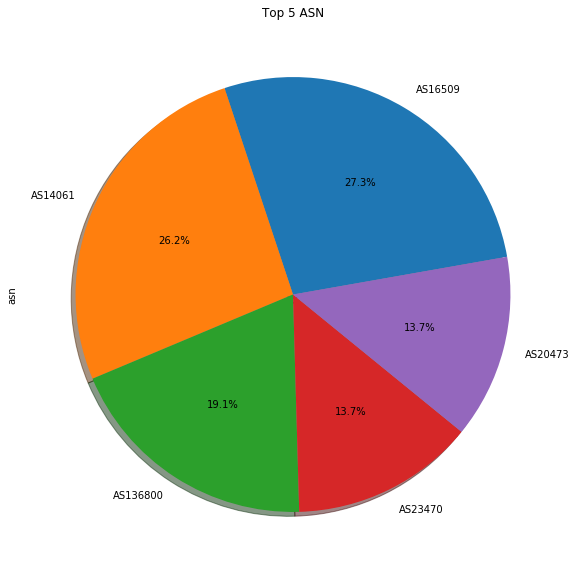

In [71]:
#plot a pie chart of the top 5 'asn' using 'nlargest(5)'
# df_json['org'].value_counts().nlargest(10).plot(kind='pie',figsize=[12,12])

df_json['asn'].value_counts().nlargest(5).plot.pie(title="Top 5 ASN", legend=False, autopct='%1.1f%%', explode=None, shadow=True, startangle=10, figsize=[10,10])

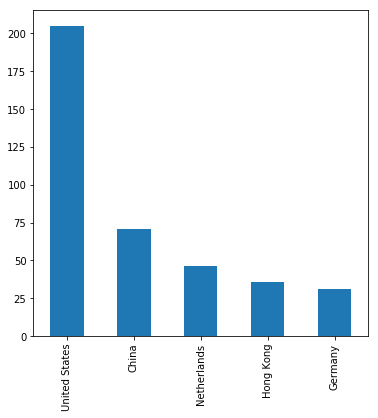

In [72]:
#plot a bar chart of the top 5 'Watermark' using 'nlargest(5)'
ax = df_json['country_name'].value_counts().nlargest(5).plot(kind='bar',figsize=[6,6])

In [73]:
#count by countries
df_json.groupby('country_name').size().reset_index(name='counts')


,country_name,counts
0,Australia,5
1,Belgium,1
...,...,...
32,United States,205
33,Vietnam,1


In [25]:
# Top 10 organizations/hosting providers
df_json['org'].value_counts().nlargest(10).reset_index(name='counts')



,index,counts
0,AMAZON-02,50
1,DIGITALOCEAN-ASN,48
2,ICIDC NETWORK,35
3,RELIABLESITE,25
4,AS-CHOOPA,25
5,"Hangzhou Alibaba Advertising Co.,Ltd.",18
6,AMAZON-AES,15
7,LEASEWEB-USA-SFO-12,14
8,Shenzhen Tencent Computer Systems Company Limited,13
9,OVH SAS,12


<AxesSubplot:>

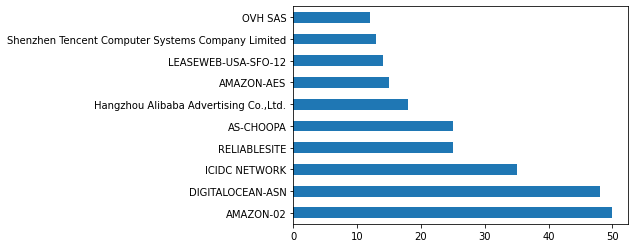

In [27]:
#Top 10 'org'

df_json['org'].value_counts().nlargest(10).plot.barh(stacked=True)

In [34]:
#decending count of "ip"
df_json['ip'].value_counts(ascending=False).reset_index(name='counts')



,index,counts
0,199.127.60.227,1
1,47.56.144.122,1
2,162.248.210.234,1
3,168.119.0.88,1
4,104.168.174.178,1
5,103.39.18.184,1
6,47.242.140.1,1
7,157.245.40.219,1
8,142.202.205.88,1
9,104.243.41.123,1


In [35]:
#if case all 'ip' values are unqiue, this is a quick check to confirm if there are any duplicates
df_json['ip'].duplicated().any()

False

In [117]:
# Show which city and postal code from each country is associated with the traffic
df_json.groupby(['country_name','city', 'postal']).size().reset_index(name='counts')

,country_name,city,postal,counts
0,Australia,Sydney,2000,5
1,Belgium,Brussels,1060,1
2,Bulgaria,Sofia,1000,2
3,Canada,Beauharnois,J6N,1
4,Canada,Montreal,H3G,1
5,Canada,Toronto,M5A,1
6,Canada,Toronto,M6E,1
7,Czechia,Prague,106 00,1
8,Czechia,Prague,110 00,2
9,Finland,Helsinki,00100,5


In [133]:
df_json.groupby(['city', 'postal', 'ip']).count()

version  region  \
city                   postal            ip                                 
Alexandria             22301             64.69.57.207           1       1   
Amsterdam              1012              88.119.171.55          1       1   
                       1064              146.0.72.91            1       1   
                                         185.232.52.137         1       1   
                                         185.232.52.41          1       1   
                                         198.44.97.180          1       1   
                                         198.44.97.181          1       1   
                                         5.2.67.9               1       1   
                                         80.209.241.7           1       1   
                                         91.229.23.63           1       1   
                       1098              134.209.200.91         1       1   
                                         134.209.92.85          1       1   
                                         161.35.81.119          1       1   
                                         165.22.199.237         1       1   
                                         64.225.75.52           1       1   
                       1101              185.156.172.13         1       1   
                       1105              31.187.64.199          1       1   
                                         31.187.64.231          1       1   
Ashburn                20147             74.118.138.144         1       1   
                                         74.118.138.25          1       1   
                       20149             100.24.69.72           1       1   
                                         174.129.144.179        1       1   
                                         18.206.136.219         1       1   
                                         3.231.164.70           1       1   
                                         3.238.74.66            1       1   
                                         3.85.60.172            1       1   
                                         3.95.159.27            1       1   
                                         34.203.235.59          1       1   
                                         34.238.192.43          1       1   
                                         35.174.172.215         1       1   
                                         52.90.168.168          1       1   
                                         54.144.48.52           1       1   
                                         54.174.1.56            1       1   
                                         54.197.151.253         1       1   
                                         54.226.33.66           1       1   
Atlanta                30305             162.248.210.234        1       1   
                       30306             142.202.205.57         1       1   
                                         142.202.205.88         1       1   
                       30318             155.138.164.216        1       1   
                                         155.138.230.65         1       1   
Beauharnois            J6N               144.217.207.21         1       1   
Bengaluru              560100            139.59.5.41            1       1   
                                         167.71.230.48          1       1   
                                         68.183.85.105          1       1   
Bloomington Springs    38545             172.93.102.164         1       1   
Boardman               97818             34.212.57.1            1       1   
                                         34.217.5.107           1       1   
                                         34.222.203.112         1       1   
                                         44.231.58.231          1       1   
                                         52.89.33.58            1       1   
                                         54.212.219.37

In [138]:
df_json.groupby(['country_name','city', 'postal', 'ip']).count()

version  \
country_name   city                   postal            ip                         
Australia      Sydney                 2000              13.211.237.247         1   
                                                        13.211.255.53          1   
                                                        3.26.14.83             1   
                                                        54.253.227.154         1   
                                                        54.66.253.144          1   
Belgium        Brussels               1060              35.241.143.134         1   
Bulgaria       Sofia                  1000              185.203.116.130        1   
                                                        185.203.117.79         1   
Canada         Beauharnois            J6N               144.217.207.21         1   
               Montreal               H3G               99.79.101.225          1   
               Toronto                M5A               142.93.152.156         1   
                                      M6E               198.27.79.75           1   
Czechia        Prague                 106 00            51.210.138.71          1   
                                      110 00            78.108.180.43          1   
                                                        78.108.180.46          1   
Finland        Helsinki               00100             95.217.197.124         1   
                                                        95.217.197.66          1   
                                                        95.217.197.67          1   
                                                        95.217.197.78          1   
                                                        95.217.197.85          1   
               Mikkeli                50130             62.236.206.5           1   
France         Gravelines             59820             51.75.255.125          1   
                                                        51.75.255.58           1   
               Nanterre               92000             193.168.147.249        1   
               Outreau                62230             145.239.41.219         1   
               Paris                  75001             15.188.88.72           1   
                                      75010             149.6.167.60           1   
               Roubaix                59100             5.196.114.192          1   
               Strasbourg             67000             51.178.83.41           1   
                                                        51.91.123.189          1   
                                                        51.91.123.194          1   
Germany        Falkenstein            08223             116.202.106.37         1   
                                                        168.119.0.88           1   
                                                        188.34.142.201         1   
                                                        5.9.55.202             1   
               Frankfurt am Main      60313             159.89.13.234          1   
                                                        161.35.76.1            1   
                                                        18.159.248.62          1   
                                                        18.193.138.37          1   
                                                        18.193.77.75           1   
                                                        18.198.25.178          1   
                                                        20.52.237.224          1   
                                                        3.122.109.210          1   
                                                        3.122.252.220          1   
                                                        3.125.158.190          1   
                                                        35.158.226.16          1   
                                         

In [135]:
df_json.groupby(['city', 'postal']).size()

city                    postal           
Alexandria              22301                 1
Amsterdam               1012                  1
                        1064                  8
                        1098                  5
                        1101                  1
                        1105                  2
Ashburn                 20147                 2
                        20149                15
Atlanta                 30305                 1
                        30306                 2
                        30318                 2
Beauharnois             J6N                   1
Bengaluru               560100                3
Bloomington Springs     38545                 1
Boardman                97818                 8
Bothell                 98011                 1
Boydton                 23917                 1
Brussels                1060                  1
Bucharest               050363                3
Budapest                1132                  

In [ ]:
df_json.

# Generate a quick report

In [32]:
profile = ProfileReport(df_json, title="Cobalt Strike Beacons", html={'style': {'full_width': True}}, sort="None")